<a href="https://colab.research.google.com/github/GruveJL/MVP2_PUCRIO_ELICOES/blob/main/MVP_2_Patrimonio_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Análise de Dados e Boas Práticas**

**Nome:** Juan Carlos da Silva Rodrigues de Lima

**Matrícula:** 4052025000033

## **Proposta do Problema**

Aproveitando o dataset utilizado na última Sprint, iremos aprofundar o estudo sobre eleições, com foco na análise exploratória dos dados de **bens declarados** pelos candidatos nas eleições municipais de 2024, realizadas no Brasil. Vale ressaltar que essa análise **não tem cunho político** e sim investigativo, o objetivo aqui é mapear e entender os dados com base em ferramentas estatísticas e responder perguntas e hipóteses sobre a conjuntura de bens dos candidatos a essa eleição.

##**Dataset**

Todos os dados aqui utilizados são disponibilizados pelo [Portal de Dados Abertos do TSE](https://dadosabertos.tse.jus.br/) sob licença aberta para uso, manipulação e divulgação.

Para o propósito de nossa investigação utilizaremos dois conjuntos de dados disponibilizados, os arquivos de candidatos (com informações básicas) e o de bens declarados dos candidatos do ano em questão:


*   2024 - Eleição Municipal [Candidatos](https://dadosabertos.tse.jus.br/dataset/candidatos-2024/resource/af76c401-0972-4ddf-8ea8-00e310ae53b4)

*   2024 - Eleição Municipal [Bens Declarados](https://dadosabertos.tse.jus.br/dataset/candidatos-2024/resource/2d078979-116f-498f-ac5b-2e2a6fb0ff1f)

### Observações sobre o Dataset

O Dataset é disponibilizado no portal do TSE "zipado", no qual o arquivo contém um .csv para cada unidade federativa do país, um arquivo consolidado e um "leiame", arquivo de catálogo dos dados disponibilizados em pdf.

Como o foco do MVP é a análise exploratória e o pré-processamento dos dados irei deixar em um [ARQUIVO APARTADO](https://colab.research.google.com/drive/1r2rcIwebG56Psui7-0Yz0iiZmHqVkgM_?usp=sharing), a parte dedicada a "engenharia" de importar o .zip no drive e ajustar o arquivo para extrair apenas o arquivo que será utilizado no nosso projeto, no caso o mais completo que seria o consolidado do país, apesar de ser um arquivo mais pesado, contém todos os dados consolidados.

Os arquivos de cátalogo da [Base de Candidatos](https://github.com/GruveJL/MVP2_PUCRIO_ELICOES/blob/c6fba3a115e8eee522f97d3fe0af00b4b6c2f9b5/doc_candidatos.pdf) e dos [Bens dos Candidatos](https://github.com/GruveJL/MVP2_PUCRIO_ELICOES/blob/c6fba3a115e8eee522f97d3fe0af00b4b6c2f9b5/doc_bens_candidatos.pdf) deixaremos disponível no GIT do projeto.

Há também uma observação sobre a base de candidatos, no Brasil as eleições podem ter um segundo turno e a base apresenta uma linha por turno para aqueles candidatos que disputaram, assim uma das primeiras etapas de tratamento será a unificação dessa base, ajustando as informações relevantes do candidado para cada turno.

## **Hipóteses do Problema**

Tentaremos aqui traçar algumas hipóteses que abordem questões do imaginário lúdico da população e do autor, a respeito do tema, tentando segregar os dados por **características dos políticos** , **partidos políticos**, e o **resultado da eleição**. Essa proposta tem como objetivo tentar identificar correlações entre os bens declarados e a posição de cada candidatura dentro desses "macro tópicos".

Como principais perguntas temos:


* 1. Podemos destinguir os candidatos de partidos e os eleitos com relação aos seus bens?
* 2. O que os Outiliers nos dizem nessa base?
** 2.1  (*Outliers*) Como se relacionam com a base os candidatos com maior patrimonio declarado?
** 2.2  (*Outliers*) Como se relacionam com a base os candidatos com menor patrimonio declarado?

* 3. Existe uma correlação entre bens e o partido do candidato?

* 4. Existe uma correlação entre bens e as características dos candidatos?



Também tentaremos responder (acrescentado de última hora), tentando cumprir um dos objetivos obrigatórios do trabalho, a seguinte questão:

---

É possível/necessário, a partir dos dados de Bens dos candidatos aplicar um processo de ML para inferir a colocação de um determinado candidato na eleição?

---

Tentaremos responder a essa indagação com a análise exploratória e realizando a preparação dos dados para a aplicação de um determinado modelo.


### Tipo de Problema

Apesar de ser um Projeto com grande foco na **Análise Exploratória** e no mapeamento dos Dados disponíveis, tentaremos entender e responder as hipóteses com processos de **classificação supervisionada**, dado um conjunto de características (quantidade de Bens, valor total de bens, partido eleitoral e demais características dos candidatos), prever o resultado da eleição para esse candidato.

## Seleção e Atributos de Dados

O Dataset de Candidatos possui 50 colunas, o de Bens possui 19 colunas, como o foco do MVP é a análise voltada para os bens, iremos manter as colunas principais da base de Bens e da base de candidatos apenas as informações essenciais, sem aprofundar muito nas características pessoais.

Segue Colunas a serem utilizadas na Base de Candidatos:
* ANO_ELEICAO - Ano da Eleição
* DT_ELEICAO - Data da Eleição
* CD_TIPO_ELEICAO - Código do Tipo de Eleição
* NM_TIPO_ELEICAO - Nome do Tipo de Eleição
* NR_TURNO - Número do Turno
* TP_ABRANGENCIA	- Tipo de Abrangência
* SG_UF - Sigla da Unidade Federativa da Disputa
* CD_CARGO - Código do Cargo Disputado
* DS_CARGO - Descrição do Cargo Disputado
* SQ_CANDIDATO - Código do Candidato (Único por eleição)
* NM_CANDIDATO - Nome do Candidato
* NM_URNA_CANDIDATO - Nome do Candidato mostrado na urna
* NR_PARTIDO - Número do Partido
* SG_PARTIDO - Sigla do Partido
* NM_PARTIDO - Nome do Partido
* SG_UF_NASCIMENTO - Sigla da Unidade Federativa de Nascimento do Candidato
* DT_NASCIMENTO - Data de Nascimento
* CD_GENERO - Código do Gênero do Candidato
* DS_GENERO	- Descrição do Gênero do Candidato
* CD_GRAU_INSTRUCAO - Código do Nível de Instrução
* DS_GRAU_INSTRUCAO	- Descrição do Grau de Instrução
* CD_ESTADO_CIVIL - Código do Estado Civil
* DS_ESTADO_CIVIL	- Descrição do Estado Cívil
* CD_COR_RACA - Código da Raça do Candidato
* DS_COR_RACA	- Descrição da Raça do Candidato
* CD_OCUPACAO	- Código da Ocupação do Candidato
* DS_OCUPACAO	- Descrição da Ocupação do Candidato
* CD_SIT_TOT_TURNO - Código da Situação do Turno
* DS_SIT_TOT_TURNO - Descrição da Situação do Turno

Segue Colunas a serem utilizadas na Base de Candidatos:
* ANO_ELEICAO - Ano da Eleição
* SQ_CANDIDATO - Código do Candidato (Único por eleição) #será usado para unir as tabelas
* CD_TIPO_BEM_CANDIDATO - Código do Tipo de Bem do Candidato
* DS_TIPO_BEM_CANDIDATO	- Descrição do Tipo de Bem do Candidato
* VR_BEM_CANDIDATO - Valor do Bem do Candidato em Reais (R$)

# Importação das Bibliotecas Necessárias e Carga de Dados

Aqui importaremos todas as Bibliotecas necessárias e as Bases a serem utilizadas.

In [39]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [227]:
# Url dos caminhos dos arquivos no Drive
url_cand = "/content/drive/MyDrive/MVP/Datasets/consulta_cand_2024_BRASIL.csv"
url_bens = "/content/drive/MyDrive/MVP/Datasets/bem_candidato_2024_BRASIL.csv"

In [228]:
# Importanto os Datasets
dataset_cand = pd.read_csv(url_cand, delimiter=';',encoding="ISO-8859-1");
dataset_bens = pd.read_csv(url_bens, delimiter=';',encoding="ISO-8859-1")

In [42]:
# Preview dos Dados Candidatos
dataset_cand.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,15/03/2025,16:30:10,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,3,ENSINO FUNDAMENTAL INCOMPLETO,1,SOLTEIRO(A),1,BRANCA,601,AGRICULTOR,-1,#NULO
1,15/03/2025,16:30:10,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,3,ENSINO FUNDAMENTAL INCOMPLETO,3,CASADO(A),3,PARDA,601,AGRICULTOR,5,SUPLENTE
2,15/03/2025,16:30:10,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,-1,#NULO
3,15/03/2025,16:30:10,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,-1,#NULO
4,15/03/2025,16:30:10,2024,2,ELEIÇÃO ORDINÁRIA,1,619,Eleições Municipais 2024,06/10/2024,MUNICIPAL,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,601,AGRICULTOR,2,ELEITO POR QP


In [43]:
# Preview dos Dados Bens
dataset_bens.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_BEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULT_ATUAL_BEM_CANDIDATO,HH_ULT_ATUAL_BEM_CANDIDATO
0,22/03/2025,12:30:40,2024,2,Eleição Ordinária,619,Eleições Municipais 2024,06/10/2024,RS,85910,CARAZINHO,210002351872,1,12,Casa,casa de alvenaria de 2 pavimentos,"120127,80",06/10/2024,19:15:18
1,22/03/2025,12:30:40,2024,2,Eleição Ordinária,619,Eleições Municipais 2024,06/10/2024,RS,85910,CARAZINHO,210002351872,2,12,Casa,casa de madeira,"374921,95",06/10/2024,19:15:18
2,22/03/2025,12:30:40,2024,2,Eleição Ordinária,619,Eleições Municipais 2024,06/10/2024,RS,85910,CARAZINHO,210002351872,3,12,Casa,Um terreno com benfeitorias,"171184,30",06/10/2024,19:15:18
3,22/03/2025,12:30:40,2024,2,Eleição Ordinária,619,Eleições Municipais 2024,06/10/2024,RS,85910,CARAZINHO,210002351872,4,32,Quotas ou quinhões de capital,50% das quotas do capital social da empresa st...,"85000,00",06/10/2024,19:15:18
4,22/03/2025,12:30:40,2024,2,Eleição Ordinária,619,Eleições Municipais 2024,06/10/2024,RS,85910,CARAZINHO,210002351872,5,41,Caderneta de poupança,Conta poupança ouro - Banco do Brasil,"92,70",06/10/2024,19:15:18


## Primeiros Tratamentos

Como dito, possuímos duas bases complementares de informações dos candidatos, a idéa nessa primeira parte de "Análise/tratamento" é entender quais colunas fazem sentido, como agrupar essas informações e principalmente unificar essas bases em um único dataset, para termos base para um possível modelo.

In [44]:
# Selecionando Colunas dos Datasets
df_candidatos = pd.DataFrame(dataset_cand[['ANO_ELEICAO','DT_ELEICAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','NR_TURNO'
    ,'TP_ABRANGENCIA','SG_UF','CD_CARGO','DS_CARGO','SQ_CANDIDATO','NM_CANDIDATO','NM_URNA_CANDIDATO'
    ,'NR_PARTIDO','SG_PARTIDO','NM_PARTIDO','SG_UF_NASCIMENTO','DT_NASCIMENTO','CD_GENERO','DS_GENERO'
    ,'CD_GRAU_INSTRUCAO','DS_GRAU_INSTRUCAO','CD_ESTADO_CIVIL','DS_ESTADO_CIVIL','CD_COR_RACA','DS_COR_RACA'
    ,'CD_OCUPACAO','DS_OCUPACAO','CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO']]);
df_bens = pd.DataFrame(dataset_bens[['ANO_ELEICAO', 'SQ_CANDIDATO', 'CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'VR_BEM_CANDIDATO',]])

In [46]:
# Total de linhas base candidatos
print(f"Total de instâncias: {len(df_candidatos)}")

Total de instâncias: 463620


In [47]:
# Total de linhas base bens
print(f"Total de instâncias: {len(df_bens)}")

Total de instâncias: 910135


### Tratamento da Base de Candidatos
Como dito, a base de Candidatos possui algumas particularidades, para entendê-las precisamos de algumas definições:


#### Definições Pertinentes

**Tipo De Eleições**: Existem as Eleições Ordinárias e as Eleições Suplementares;
* Eleições Ordinárias - Aquelas que ocorrem periódicamente a cada 4 anos.
* Eleições Suplementares - Eleições extraordinárias, que ocorrem quando há anulação da maioria dos votos ou o candidato eleito é caçado.

[Referência_1](https://www.tse.jus.br/comunicacao/noticias/2025/Fevereiro/voce-sabe-o-que-e-uma-eleicao-suplementar)

**OBS**: Análisaremos apenas as **eleições ordinárias.**
****
**Turnos Eleitorais**: Em cidades com mais de 200 Mil habitantes deve haver um 2º Turno em caso de nenhum candidato alcançar 50% + 1 dos votos válidos.

[Referência_2](https://www.tse.jus.br/comunicacao/noticias/2024/Outubro/voce-sabe-o-que-e-turno-eleitoral-o-glossario-explica)

Portanto nos próximos passos iremos filtrar os dados de candidatos da eleições Ordinárias e selecionar as linhas de segundo turno dos candidatos que concorreram ao segundo turno, com isso gerando uma base de candidatos com apenas uma linha por candidato.

**OBS**: A idade dos candidatos será calculada com base na data de nascimento disponível na base e a data da realização da eleição, em 2024 o primeiro turno ocorreu no dia 06 de outubro e o segundo turno no dia 27 do mesmo mês, haverá uma mínima diferença na comparação.

#### Tratando Base Candidatos

In [48]:
# Filtrar Eleições Ordinárias
filtro_tp_eleicao = df_candidatos['CD_TIPO_ELEICAO'] == 2
df_candidatos_filtrado = df_candidatos[filtro_tp_eleicao]

In [49]:
# Tamanho da base filtrada
len_total = len(df_candidatos_filtrado)
print(f"Total de instâncias: {len(df_candidatos_filtrado)}")

Total de instâncias: 463598


Verificando linhas duplicadas

Aqui usaremos o método "*duplicated()*", com ele podemos avaliar a quantidade de repetições de uma determinada coluna da base.

In [50]:
# Aplicando método Duplicated
duplicados = df_candidatos_filtrado[['SQ_CANDIDATO']].duplicated()

# soma dos duplicados
num_duplicados = duplicados.sum()

print("Número de Candidatos Duplicados:", num_duplicados) #concorreram 2º turno

Número de Candidatos Duplicados: 204


Temos 204 candidatos que participaram de um 2º Turno.

In [51]:
# Selecionar linhas dos candidatos que participaram do segundo turno
filtro_2_turno =  df_candidatos_filtrado['NR_TURNO'] == 2

df_candidatos_2t = df_candidatos_filtrado[['SQ_CANDIDATO']][filtro_2_turno]

print(f"Total de instâncias: {len(df_candidatos_2t)}")

Total de instâncias: 204


Vamos retirar esses 204 candidatos da base principal e incluí-los depois, retirando assim as duplicatas.

In [52]:
# tirando os candidatos que participaram do 2º turno

codigos_para_excluir = df_candidatos_2t["SQ_CANDIDATO"].unique()

df_filtrado_1t = df_candidatos_filtrado[~df_candidatos_filtrado["SQ_CANDIDATO"].isin(codigos_para_excluir)]
len_filtro = len(df_filtrado_1t)
print(f"Total de instâncias: {len(df_filtrado_1t)}")

Total de instâncias: 463190


In [53]:
#validação de linhas retiradas
len_total - len_filtro

408

In [54]:
# DF Candidatos Final

#df dos candidatos de 2º turno
df_filtrado_2t = df_candidatos_filtrado[filtro_2_turno]

#df final dos candidatos únicos do 1º turno + únicos do 2º turno
df_cand_final = pd.concat([df_filtrado_1t, df_filtrado_2t], ignore_index=True)


len_final = len(df_cand_final)
print(f"Total de instâncias: {len(df_cand_final)}")

Total de instâncias: 463394


In [55]:
#Validação final
len_filtro + num_duplicados

np.int64(463394)

Como visto, retiramos 408 linhas (204 duplicações) e acrescentamos as 204 linhas únicas dos candidatos de 2º turno.

In [56]:
df_cand_final.head()

,ANO_ELEICAO,DT_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,TP_ABRANGENCIA,SG_UF,CD_CARGO,DS_CARGO,SQ_CANDIDATO,...,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,2024,06/10/2024,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,PE,13,VEREADOR,170002016671,...,3,ENSINO FUNDAMENTAL INCOMPLETO,1,SOLTEIRO(A),1,BRANCA,601,AGRICULTOR,-1,#NULO
1,2024,06/10/2024,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,PE,13,VEREADOR,170002204328,...,3,ENSINO FUNDAMENTAL INCOMPLETO,3,CASADO(A),3,PARDA,601,AGRICULTOR,5,SUPLENTE
2,2024,06/10/2024,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,PE,13,VEREADOR,170002025399,...,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,-1,#NULO
3,2024,06/10/2024,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,PE,13,VEREADOR,170002025400,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,-1,#NULO
4,2024,06/10/2024,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,PE,13,VEREADOR,170002204319,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,601,AGRICULTOR,2,ELEITO POR QP


Vamos agora gerar a coluna com a idade dos candidatos, essa coluna pode ser extremamente relevante, mas como se trata de um valor discreto, provavelmente transformaremos em categorias por faixa, para uma análise mais aprofundada.

Gerando coluna com a idade dos candidatos:

In [57]:
# Validando formato dos campos de data
df_cand_final["DT_NASCIMENTO"] = pd.to_datetime(df_cand_final["DT_NASCIMENTO"], format="%d/%m/%Y", errors="coerce")
df_cand_final["DT_ELEICAO"] = pd.to_datetime(df_cand_final["DT_ELEICAO"], format="%d/%m/%Y", errors="coerce")

# Calcular a idade
df_cand_final["IDADE_CAND"] = df_cand_final["DT_ELEICAO"].dt.year - df_cand_final["DT_NASCIMENTO"].dt.year

# Ajustar para quem ainda não fez aniversário no ano do evento
df_cand_final["IDADE_CAND"] -= (
    (df_cand_final["DT_ELEICAO"].dt.month < df_cand_final["DT_NASCIMENTO"].dt.month) |
    (
        (df_cand_final["DT_ELEICAO"].dt.month == df_cand_final["DT_NASCIMENTO"].dt.month) &
        (df_cand_final["DT_ELEICAO"].dt.day < df_cand_final["DT_NASCIMENTO"].dt.day)
    )
).astype(int)

Incluímos aqui uma espécie de validação sobre o dia e o mês para garantir a idade real dada a data da eleição, lembrando a pequena diferença de dias com relação ao primeiro e o segundo turno.

In [58]:
df_cand_final.head()

,ANO_ELEICAO,DT_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,TP_ABRANGENCIA,SG_UF,CD_CARGO,DS_CARGO,SQ_CANDIDATO,...,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,IDADE_CAND
0,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,PE,13,VEREADOR,170002016671,...,ENSINO FUNDAMENTAL INCOMPLETO,1,SOLTEIRO(A),1,BRANCA,601,AGRICULTOR,-1,#NULO,47.0
1,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,PE,13,VEREADOR,170002204328,...,ENSINO FUNDAMENTAL INCOMPLETO,3,CASADO(A),3,PARDA,601,AGRICULTOR,5,SUPLENTE,55.0
2,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,PE,13,VEREADOR,170002025399,...,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,-1,#NULO,41.0
3,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,PE,13,VEREADOR,170002025400,...,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,-1,#NULO,56.0
4,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,PE,13,VEREADOR,170002204319,...,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,601,AGRICULTOR,2,ELEITO POR QP,42.0


Como boas práticas é sempre importante salvar pontos intermediários da análise, como acabamos as modificações primeiras na base de candidatos salvaremos esse *step*.

Salvando .csv final dos candidatos, arquivo que usaremos como base da análise e mantendo a cópia do arquivo original.

In [59]:
df_cand_final.to_csv('/content/drive/MyDrive/MVP/candidatos.csv', index=False)

### Tratamento da Base de Bens

Como realizamos alguns filtros e tratamentos na base de Candidatos, vamos realizar o filtro na base de Bens, pegando apenas os dados dos candidatos que iremos avaliar.

In [60]:
print(f"Total de instâncias: {len(df_bens)}")

Total de instâncias: 910135


Filtrando a base de bens com base na base de candidatos:

In [61]:
# Filtrando base de Bens com base nos Candidatos
df_bens = df_bens[df_bens['SQ_CANDIDATO'].isin(df_cand_final['SQ_CANDIDATO'])]


In [62]:
# Quantidade de entradas da base de bens
print(f"Total de instâncias: {len(df_bens)}")

Total de instâncias: 910061


Perceba que a base de bens possui mais entradas que a base de candidatos, isso porque a base está estruturada na granularidade de bem possuido pelo candidato, vamos unificar essa base por tipo de bem e criando uma nova coluna com a quantidade de cada bem.

Para isso realizaremos um tratamento no campo de valor (que está com tipo 'object') e fazer o agrupamento.

Aproveitaremos para criar o campo 'QTD_BEM_CANDIDATO', contando a quantiodade de entradas por tipo de bem.

In [63]:
# Substitui vírgula por ponto e converte para float
df_bens['VR_BEM_CANDIDATO'] = df_bens['VR_BEM_CANDIDATO'].str.replace(',', '.', regex=False).astype(float);

In [64]:
df_bens.head()

,ANO_ELEICAO,SQ_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,2024,210002351872,12,Casa,120127.80
1,2024,210002351872,12,Casa,374921.95
2,2024,210002351872,12,Casa,171184.30
3,2024,210002351872,32,Quotas ou quinhões de capital,85000.00
4,2024,210002351872,41,Caderneta de poupança,92.70


In [65]:
# Agrupando Base por tipo de ben

resumo_bens = df_bens.groupby(['ANO_ELEICAO', 'SQ_CANDIDATO', 'CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO'])['VR_BEM_CANDIDATO'].agg(
    VR_BEM_CANDIDATO ='sum',          # soma dos valores
    QTD_BEM_CANDIDATO ='count'   # quantidade de itens
).reset_index()

# Sample de dados para pegar valores diferente do head
resumo_bens.sample(5)

,ANO_ELEICAO,SQ_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO,QTD_BEM_CANDIDATO
24583,2024,50001976679,61,Depósito bancário em conta corrente no País,2369.42,1
73037,2024,80001881132,21,"Veículo automotor terrestre: caminhão, automóv...",86866.70,1
365547,2024,170002246320,11,Apartamento,38000.00,1
29207,2024,50002012761,61,Depósito bancário em conta corrente no País,36742.68,2
526757,2024,250001926452,32,Quotas ou quinhões de capital,398827.00,4


In [66]:
print(f"Total de instâncias: {len(resumo_bens)}")

Total de instâncias: 643342


Salvando .csv final de bens, arquivo que usaremos como base da análise e mantendo a cópia do arquivo original.

In [67]:
resumo_bens.to_csv('/content/drive/MyDrive/MVP/bens.csv', index=False)

*****

### Validação dos dados e unificação do Dataset

Nesta etapa iremos aprofundar nas colunas selecionadas e unificar os datasets, para que possamos dar inicio a nossa Análise exploratória.

In [68]:
# Importar .csv's recem gerados
url_candidatos = '/content/drive/MyDrive/MVP/candidatos.csv'
url_bens = '/content/drive/MyDrive/MVP/bens.csv'

# Dataframes dos arquivos exportados
df_candidatos = pd.DataFrame(pd.read_csv(url_candidatos, delimiter=','));
df_bens = pd.DataFrame(pd.read_csv(url_bens, delimiter=','))

Vamos **unificar** as tabelas, utilizando o método *merge* que fará o *join* das tabelas, utilizaremos o *Left Join* tendo como base a esquerda a base de candidatos, considerando que pode haver candidatos sem declaração de bens.

In [70]:
#Join nas tabelas
df_final = pd.merge(df_candidatos,df_bens, on=['SQ_CANDIDATO'], how='left')

In [72]:
# sample da base de dados
df_final.sample(5)

,ANO_ELEICAO_x,DT_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,TP_ABRANGENCIA,SG_UF,CD_CARGO,DS_CARGO,SQ_CANDIDATO,...,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,IDADE_CAND,ANO_ELEICAO_y,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO,QTD_BEM_CANDIDATO
35380,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,SP,13,VEREADOR,250001899395,...,125,ADMINISTRADOR,2,ELEITO POR QP,48.0,2024.0,45.0,"Aplicação de renda fixa (CDB, RDB e outros)",60735.99,3.0
543677,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,RO,13,VEREADOR,220002301799,...,999,OUTROS,4,NÃO ELEITO,41.0,2024.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",14000.00,1.0
571919,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,BA,13,VEREADOR,50001895896,...,298,SERVIDOR PÚBLICO MUNICIPAL,2,ELEITO POR QP,51.0,2024.0,32.0,Quotas ou quinhões de capital,65000.00,1.0
314226,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,BA,13,VEREADOR,50001925157,...,278,VEREADOR,2,ELEITO POR QP,50.0,2024.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",18000.00,1.0
216529,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,BA,13,VEREADOR,50002270610,...,298,SERVIDOR PÚBLICO MUNICIPAL,4,NÃO ELEITO,46.0,NaN,NaN,NaN,NaN,NaN


Ao fazer o *join* apenas por "SQ_CANDIDATO" reparamos na duplicação da coluna 'ANO_ELEICAO'.

Isso acontece pois a coluna existe nas duas tabelas e quando unificadas trazem os dois campos distintos de cada coluna.

Como estamos usando a base de candidatos como left, basta incluirmos o campo 'ANO_ELEICAO' nos parâmetros do join e será resolvido.

In [73]:
# Validando quantidade de entradas
print(f"Total de instâncias: {len(df_final)}")

Total de instâncias: 810830


Refazendo join:


In [74]:
#Join nas tabelas com ano da eleição
df_final = pd.merge(df_candidatos,df_bens, on=['SQ_CANDIDATO','ANO_ELEICAO'], how='left')

In [75]:
# Validando quantidade de entradas do novo join
print(f"Total de instâncias: {len(df_final)}")

Total de instâncias: 810830


In [76]:
# sample da base de dados
df_final.sample(5)

,ANO_ELEICAO,DT_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,TP_ABRANGENCIA,SG_UF,CD_CARGO,DS_CARGO,SQ_CANDIDATO,...,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,IDADE_CAND,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO,QTD_BEM_CANDIDATO
661592,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,MA,13,VEREADOR,100002349051,...,PARDA,222,NUTRICIONISTA E ASSEMELHADOS,5,SUPLENTE,23.0,21.0,"Veículo automotor terrestre: caminhão, automóv...",16000.0,1.0
404026,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,TO,13,VEREADOR,270002137964,...,PARDA,512,CABELEIREIRO E BARBEIRO,4,NÃO ELEITO,48.0,12.0,Casa,300000.0,1.0
456060,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,PE,13,VEREADOR,170002135475,...,PARDA,999,OUTROS,5,SUPLENTE,59.0,12.0,Casa,20000.0,1.0
515324,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,BA,13,VEREADOR,50002071229,...,PRETA,999,OUTROS,5,SUPLENTE,29.0,NaN,NaN,NaN,NaN
663285,2024,2024-10-06,2,ELEIÇÃO ORDINÁRIA,1,MUNICIPAL,RS,13,VEREADOR,210001967565,...,BRANCA,531,MOTORISTA DE VEÍCULOS DE TRANSPORTE COLETIVO D...,3,ELEITO POR MÉDIA,45.0,63.0,Dinheiro em espécie - moeda nacional,45000.0,1.0


Podemos seguir agora...

#### Entendendo as colunas de Dados do Dataset
Teremos a seguir uma parte relativamente massante, pois iremos aprofundar dentro das colunas, entendendo o que faz sentido manter para gerar nosso dataset final, unificado com as duas bases. Nessa etapa faremos mais alguns tratamentos, possíveis exclusões de linhas com dados faltantes, e conversão de valores.

Optamos por fazer todas as análises dos campos e aplicar as alterações no final.

OBS: Se preferir pule para o tópico 'Criação da Base Final' desse tema.

Vamos aprofundar agora vendo a quantidade de entradas por categoria e a contagem de tipos distintos de dados em cada coluna.

In [77]:
# Informações das colunas
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810830 entries, 0 to 810829
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ANO_ELEICAO            810830 non-null  int64  
 1   DT_ELEICAO             810830 non-null  object 
 2   CD_TIPO_ELEICAO        810830 non-null  int64  
 3   NM_TIPO_ELEICAO        810830 non-null  object 
 4   NR_TURNO               810830 non-null  int64  
 5   TP_ABRANGENCIA         810830 non-null  object 
 6   SG_UF                  810830 non-null  object 
 7   CD_CARGO               810830 non-null  int64  
 8   DS_CARGO               810830 non-null  object 
 9   SQ_CANDIDATO           810830 non-null  int64  
 10  NM_CANDIDATO           810830 non-null  object 
 11  NM_URNA_CANDIDATO      810827 non-null  object 
 12  NR_PARTIDO             810830 non-null  int64  
 13  SG_PARTIDO             810830 non-null  object 
 14  NM_PARTIDO             810830 non-nu

In [78]:
# Entradas Únicas
df_final.nunique()

,0
ANO_ELEICAO,1
DT_ELEICAO,2
CD_TIPO_ELEICAO,1
NM_TIPO_ELEICAO,1
NR_TURNO,2
TP_ABRANGENCIA,1
SG_UF,26
CD_CARGO,3
DS_CARGO,3
SQ_CANDIDATO,463394


Vamos começar analisando os cargos de disputa, como visto acima temos trÊs entradas distintas, entretando as eleições Municipais são para eleger Prefeitos e Vereadores.

In [79]:
# Entradas únicas de cargos em disputa
df_final.groupby(['CD_CARGO', 'DS_CARGO'])['SQ_CANDIDATO'].nunique().reset_index()

,CD_CARGO,DS_CARGO,SQ_CANDIDATO
0,11,PREFEITO,15574
1,12,VICE-PREFEITO,15818
2,13,VEREADOR,432002


Perceba que na base possuímos informações do cargo de VICE-PREFEITO, como não cabe a análise iremos retirar esse cargo do dataset.

In [80]:
print(f"Total de instâncias: {len(df_final)}")

Total de instâncias: 810830


In [81]:
# Gerando base mantendo apenas os cargos de Prefeito e Vereador(11,13)
df_final = df_final[df_final['CD_CARGO'].isin([11, 13])]

In [82]:
print(f"Total de instâncias: {len(df_final)}")

Total de instâncias: 767215


Por fim, verificamos os nulos do campo:

In [83]:
# Verificando Nulos no campo cargo
df_final['CD_CARGO'].isna().sum()

np.int64(0)

Vamos agora olhar a "SG_UF_NASCIMENTO", pois se perceber existem 29 entradas distintas sendo que possuímos 26 entradas de "SG_UF". (São 27 unidades federativas porém o Distrito Federal não possui Cargos de Prefeito e Vereador)

In [84]:
# Entradas únicas de UF de nascimento
df_final[['SG_UF_NASCIMENTO']].value_counts()

,count
SG_UF_NASCIMENTO,
MG,127936
SP,123099
PR,69818
RS,66391
BA,57025
SC,39743
GO,29479
RJ,29313
MA,26289


Como visto temos 3 entradas estranhas, o 'Não divulgável' com 42 entradas, o 'ZZ' com 466 entradas e o 'DF' (esperado) com 2976 entradas. Como essa coluna pode não afetar diretamente nossa análise, iremos manter (por enquanto), do jeito que se encontra.

In [85]:
# Verificando Nulos no campo UF de Nascimento
df_final['SG_UF_NASCIMENTO'].isna().sum()

np.int64(0)

Vamos agora avaliar o campo 'DT_NASCIMENTO' pois temos alguns valores nulos e muitas entradas. Para isso olharemos o campo "IDADE_CAND" gerado anteriormente.

In [86]:
# Verificando Nulos no campo Idade
df_final['IDADE_CAND'].isna().sum()

np.int64(51)

In [87]:
# Verificando Nulos no campo DT Nascimento
df_final['DT_NASCIMENTO'].isna().sum()

np.int64(51)

Como o número de nulos é o mesmo e a idéia da análise é usar a idade ou agrupamentos de idade e considerando o baixo número com relação ao total, vamos retirar as linhas com informação nula:

In [88]:
# Quantidade de instâncias
print(f"Total de instâncias: {len(df_final)}")

Total de instâncias: 767215


In [89]:
df_final.dropna(subset=['DT_NASCIMENTO'], inplace=True)

In [90]:
# Quantidade de instâncias
print(f"Total de instâncias: {len(df_final)}")

Total de instâncias: 767164


****

Vamos avaliar o campo 'Genero':

In [91]:
# Entradas distintas
df_final.groupby(['DS_GENERO', 'CD_GENERO'])['SQ_CANDIDATO'].nunique().reset_index()

,DS_GENERO,CD_GENERO,SQ_CANDIDATO
0,FEMININO,4,155326
1,MASCULINO,2,292205


In [92]:
# Nulos
df_final['DS_GENERO'].isna().sum()

np.int64(0)

Aparentemente normal sem necessidade de ajustes...

Vamos avaliar o campo 'Grau de Instrução':

In [93]:
# Entradas Distintas
df_final.groupby(['CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO'])['SQ_CANDIDATO'].nunique().reset_index()

,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,SQ_CANDIDATO
0,1,ANALFABETO,13
1,2,LÊ E ESCREVE,9732
2,3,ENSINO FUNDAMENTAL INCOMPLETO,47217
3,4,ENSINO FUNDAMENTAL COMPLETO,49772
4,5,ENSINO MÉDIO INCOMPLETO,20647
5,6,ENSINO MÉDIO COMPLETO,175900
6,7,SUPERIOR INCOMPLETO,20485
7,8,SUPERIOR COMPLETO,123765


In [94]:
# Nulos
df_final['CD_GRAU_INSTRUCAO'].isna().sum()

np.int64(0)

Também normal sob essas análises

Vamos avaliar o campo 'Estado Civil':

In [117]:
# Entradas Distintas
df_final.groupby(['CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL'])['SQ_CANDIDATO'].nunique().reset_index()

,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,SQ_CANDIDATO
0,-4,NÃO DIVULGÁVEL,42
1,1,SOLTEIRO(A),168422
2,3,CASADO(A),223858
3,5,VIÚVO(A),9076
4,7,SEPARADO(A) JUDICIALMENTE,3576
5,9,DIVORCIADO(A),42602


In [118]:
#Nulos
df_final['CD_GRAU_INSTRUCAO'].isna().sum()

np.int64(0)

Podemos seguir...

Vamos avaliar o campo 'Raça':

In [119]:
# Entradas distintas
df_final.groupby(['CD_COR_RACA', 'DS_COR_RACA'])['SQ_CANDIDATO'].nunique().reset_index()

,CD_COR_RACA,DS_COR_RACA,SQ_CANDIDATO
0,-4,NÃO DIVULGÁVEL,42
1,1,BRANCA,207670
2,2,PRETA,51449
3,3,PARDA,181486
4,4,AMARELA,1717
5,5,INDÍGENA,2510
6,6,NÃO INFORMADO,2702


In [95]:
# Nulos
df_final['CD_COR_RACA'].isna().sum()

np.int64(0)

Sem necessidades de alterações

Vamos avaliar o campo 'Ocupação':

In [121]:
# Entradas distintas
df_final.groupby(['CD_OCUPACAO', 'DS_OCUPACAO'])['SQ_CANDIDATO'].nunique().reset_index()

,CD_OCUPACAO,DS_OCUPACAO,SQ_CANDIDATO
0,-4,NÃO DIVULGÁVEL,42
1,101,ENGENHEIRO,2155
2,102,ARQUITETO,388
3,103,AGRÔNOMO,426
4,104,QUÍMICO,49
...,...,...,...
249,921,MILITAR REFORMADO,1128
250,922,SERVIDOR PÚBLICO CIVIL APOSENTADO,1193
251,923,APOSENTADO (EXCETO SERVIDOR PÚBLICO),16718
252,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",4540


In [122]:
# Nulos
df_final['DS_OCUPACAO'].isna().sum()

np.int64(0)

Normal, entretando possuímos diversas entradas, talvez aqui caiba mais a diante um agrupamento por áreas de interesse.

Vamos Avaliar o campo de tipo de Ben Declarado:

In [123]:
df_final.groupby(['CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO'])['SQ_CANDIDATO'].nunique().reset_index()

,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,SQ_CANDIDATO
0,1.0,Prédio residencial,1930
1,2.0,Prédio comercial,3466
2,3.0,Galpão,1082
3,11.0,Apartamento,16768
4,12.0,Casa,103001
5,13.0,Terreno,51815
6,14.0,Terra nua,10100
7,15.0,Sala ou conjunto,1397
8,16.0,Construção,1580
9,17.0,Benfeitorias,850


In [124]:
df_final['CD_TIPO_BEM_CANDIDATO'].isna().sum()

np.int64(164757)

Muitos Nulos e aqui também a possibilidade de uma melhor agregação dos dados.

Validar Nulos no valor do bem:

In [125]:
df_final['VR_BEM_CANDIDATO'].isna().sum()

np.int64(164757)

Exatamente a mesma quantidade de nulos que o tipo de ben, representando as possíveis entradas de candidatos sem declaração de bens, vamos tratar mais a frente...

Por fim vamos validar o último campo 'Situação' que mostra o resultado do Candidato na Eleição, para ele precisamos de uma segunda rodada das Definições:

#### Definições Pertinentes 2

Nas Eleições um candidato pode ser eleito mesmo não obtendo a maioria dos votos, isso occorre para cargos como Deputado e Vereador.

Esses cargos podem ser eleitos por Quoeficiente Partidário (QP), em resumo envolve a contagem de votos no candidato e no partido, assim partidos com muitos votos conseguem eleger candidatos mesmo que os mesmo não tenham atingido quantidade necessária para ganhar a disputa.


[Referência_3](https://www.tse.jus.br/comunicacao/noticias/2023/Julho/quocientes-eleitoral-partidario-e-sobras-por-media-entenda-como-funcionam-esses-calculos-eleitorais)

Para a nossa análise consideraremos todas as formas de "Eleito", e tudo aquilo que não for eleito será não eleito, pois pela lógica não pode haver um resultado nulo ou diferente disso nas eleições.

In [96]:
# Distintas entradas no campo de situação da eleição
df_final.groupby(['CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'])['SQ_CANDIDATO'].nunique().reset_index()

,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,SQ_CANDIDATO
0,-1,#NULO,16424
1,1,ELEITO,5542
2,2,ELEITO POR QP,40001
3,3,ELEITO POR MÉDIA,18071
4,4,NÃO ELEITO,129775
5,5,SUPLENTE,237717
6,6,2º TURNO,1


In [97]:
# Nulos
df_final['CD_SIT_TOT_TURNO'].isna().sum()

np.int64(0)

Perceba que temos nas entradas do campo o valo "#NULO", mesmo não havendo valores nulos no campo.

### Criação da Base Final

Como vimos a maioria dos campos de características não possui valores nulos e não possui muitos valores não esperados nos campos.

Portanto vamos realizar as seguintes ações:



*   1. Seleção final das colunas pertinentes ao estudo
*   2. Prencher valor de bens nulos com "0"
*   3. Recriar categoria de tipo de bens
*   4. Recriar categoria de ocupação
*   5. Conversão das Colunas de Situação da Eleição para Eleito (1) e Não Eleito(2)

Segue alterações:

1. Seleção das colunas

Pensando que vamos possivelmente transformar esses dados para um modelo, vamos selecionar apenas os campos que poderão serão utilizados e seus respectivos códigos.

In [98]:
#Selecionando Colunas Pertinentes ao modelo
df_final_filtrado = df_final[['ANO_ELEICAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','TP_ABRANGENCIA','SG_UF','CD_CARGO','DS_CARGO','SQ_CANDIDATO','NM_CANDIDATO','NR_PARTIDO','SG_PARTIDO','IDADE_CAND','CD_GENERO','DS_GENERO'
    ,'CD_GRAU_INSTRUCAO','DS_GRAU_INSTRUCAO','CD_ESTADO_CIVIL','DS_ESTADO_CIVIL','CD_COR_RACA','DS_COR_RACA'
    ,'CD_OCUPACAO','DS_OCUPACAO','CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO','CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'VR_BEM_CANDIDATO','QTD_BEM_CANDIDATO']]



2. Preenchendo Valores Nulos com "0" e Tipos de Bens com "Não Declarado"(7)

Aqui vamos subistituir os nulos encontrados nos valores para zero, e os tipos de bens para 'Não Declarado'

In [99]:
# Nulos no campo de tipo de bem
df_final_filtrado['DS_TIPO_BEM_CANDIDATO'].isna().sum()

np.int64(164713)

In [100]:
# Nulos no campo de valor do bem
df_final_filtrado['VR_BEM_CANDIDATO'].isna().sum()

np.int64(164713)

In [101]:
# Substituindo entradas nulas
df_final_filtrado['DS_TIPO_BEM_CANDIDATO'] = df_final_filtrado['DS_TIPO_BEM_CANDIDATO'].fillna('Não Declarado')
df_final_filtrado['VR_BEM_CANDIDATO'] = df_final_filtrado['VR_BEM_CANDIDATO'].fillna(0)

/tmp/ipython-input-101-810499564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filtrado['DS_TIPO_BEM_CANDIDATO'] = df_final_filtrado['DS_TIPO_BEM_CANDIDATO'].fillna('Não Declarado')
/tmp/ipython-input-101-810499564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filtrado['VR_BEM_CANDIDATO'] = df_final_filtrado['VR_BEM_CANDIDATO'].fillna(0)


In [102]:
df_final_filtrado['CD_TIPO_BEM_CANDIDATO'].isna().sum()

np.int64(164713)

Faltou um ajuste no campo de código do bem, para fazê-lo vamos primeiro aplicar uma agregação nos tipos como segue:

3. Recriar tipos de Bens

Agora Vamos Agrupar os tipos de Bens, para facilitar adaptamos para 5 macros categorias:
* Imóveis (1)
* Transporte (2)
* Investimentos (3)
* Dinheiro/Depósitos (4)
* Créditos e Direitos (5)

O Restante entrará na Categoria "Outros" (6).

E o "Não Declarado" (7)

In [103]:
# Preencher nulos do código com valor 7
df_final_filtrado['CD_TIPO_BEM_CANDIDATO'] = df_final_filtrado['CD_TIPO_BEM_CANDIDATO'].fillna(7)

/tmp/ipython-input-103-406404529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filtrado['CD_TIPO_BEM_CANDIDATO'] = df_final_filtrado['CD_TIPO_BEM_CANDIDATO'].fillna(7)


Agora vamos recriar as categorias:

In [104]:
#Vamos Recriar a Categoria de Bens
mapa_categorias = {
    'Prédio residencial': 'Imóveis',
    'Prédio comercial': 'Imóveis',
    'Galpão': 'Imóveis',
    'Apartamento': 'Imóveis',
    'Casa': 'Imóveis',
    'Terreno': 'Imóveis',
    'Terra nua': 'Imóveis',
    'Sala ou conjunto': 'Imóveis',
    'Construção': 'Imóveis',
    'Benfeitorias': 'Imóveis',
    'Loja': 'Imóveis',
    'Outros bens imóveis': 'Imóveis',

    'Veículo automotor terrestre: caminhão, automóvel, moto, etc.': 'Transporte',
    'Aeronave': 'Transporte',
    'Embarcação': 'Transporte',

    'Ações (inclusive as provenientes de linha telefônica)': 'Investimentos',
    'Quotas ou quinhões de capital': 'Investimentos',
    'Outras participações societárias': 'Investimentos',
    'Caderneta de poupança': 'Investimentos',
    'Aplicação de renda fixa (CDB, RDB e outros)': 'Investimentos',
    'Ouro, ativo financeiro': 'Investimentos',
    'Mercado futuros, de opções e a termo': 'Investimentos',
    'Outras aplicações e Investimentos': 'Investimentos',
    'Fundo de Curto Prazo': 'Investimentos',
    'Fundo de Longo Prazo e Fundo de Investimentos em Direitos Creditórios': 'Investimentos',
    'Fundo de Investimento Imobiliário': 'Investimentos',
    'Fundos: Ações, Mútuos de Privatização, Invest. em Empresas Emergentes, etc.': 'Investimentos',
    'VGBL - Vida Gerador de Benefício Livre': 'Investimentos',
    'Título de clube e assemelhado': 'Investimentos',
    'Outros fundos': 'Investimentos',
    'Outros créditos e poupança vinculados': 'Investimentos',
    'Poupança para construção ou aquisição de bem imóvel': 'Investimentos',
    'Fundo de Longo Prazo e Fundo de Investimentos em Direitos Creditórios (FIDC)': 'Investimentos',
    'Fundos: Ações, Mútuos de Privatização, Invest. Empresas Emergentes, Invest.Participação e Invest. Índice Mercado': 'Investimentos',

    'Depósito bancário em conta corrente no País': 'Dinheiro/Depósitos',
    'Depósito bancário em conta corrente no exterior': 'Dinheiro/Depósitos',
    'Dinheiro em espécie - moeda nacional': 'Dinheiro/Depósitos',
    'Dinheiro em espécie - moeda estrangeira': 'Dinheiro/Depósitos',
    'Outros depósitos à vista e numerário': 'Dinheiro/Depósitos',

    'Crédito decorrente de empréstimo': 'Créditos e Direitos',
    'Crédito decorrente de alienação': 'Créditos e Direitos',
    'Plano PAIT e caderneta de pecúlio': 'Créditos e Direitos',
    'Consórcio não contemplado': 'Créditos e Direitos',
    'Licença e concessões especiais': 'Créditos e Direitos',
    'Direito de autor, de inventor e patente': 'Créditos e Direitos',
    'Direito de lavra e assemelhado': 'Créditos e Direitos',
    'Leasing': 'Créditos e Direitos',

    'Não Declarado': 'Não Declarado'



}

mapa_cod_categoria = {
    1.0: 1, 2.0: 1, 3.0: 1, 11.0: 1, 12.0: 1,
    13.0: 1, 14.0: 1, 15.0: 1, 16.0: 1, 17.0: 1,
    18.0: 1, 19.0: 1,
    21.0: 2, 22.0: 2, 23.0: 2,
    24.0: 6, 25.0: 6, 26.0: 6, 29.0: 6,
    31.0: 3, 32.0: 3, 39.0: 3, 41.0: 3,
    45.0: 3, 46.0: 3, 47.0: 3, 49.0: 3,
    54.0: 3, 59.0: 3, 71.0: 3,
    72.0: 3, 73.0: 3, 74.0: 3, 79.0: 3,
    92.0: 3, 97.0: 3,
    51.0: 5, 52.0: 5, 53.0: 5,
    91.0: 5, 93.0: 5, 94.0: 5,
    95.0: 5, 96.0: 5,
    61.0: 4, 62.0: 4, 63.0: 4,
    64.0: 4, 69.0: 4,
    99.0: 6,
    7:7
}

# Aplicar a categoria
df_final_filtrado['DS_TIPO_BEM_CANDIDATO'] = df_final_filtrado['DS_TIPO_BEM_CANDIDATO'].map(mapa_categorias)

# Preencher os que não foram mapeados com "Outros"
df_final_filtrado['DS_TIPO_BEM_CANDIDATO'] = df_final_filtrado['DS_TIPO_BEM_CANDIDATO'].fillna('Outros')

# Trocar códigos dos tipos de bens
df_final_filtrado['CD_TIPO_BEM_CANDIDATO'] = df_final_filtrado['CD_TIPO_BEM_CANDIDATO'].map(mapa_cod_categoria)

/tmp/ipython-input-104-3884292785.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filtrado['DS_TIPO_BEM_CANDIDATO'] = df_final_filtrado['DS_TIPO_BEM_CANDIDATO'].map(mapa_categorias)
/tmp/ipython-input-104-3884292785.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_filtrado['DS_TIPO_BEM_CANDIDATO'] = df_final_filtrado['DS_TIPO_BEM_CANDIDATO'].fillna('Outros')
/tmp/ipython-input-104-3884292785.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [105]:
# Quantidade de entradas
print(f"Total de instâncias: {len(df_final_filtrado)}")

Total de instâncias: 767164


In [107]:
# Resumo da transformação com base na contagem de SQ_candidato distinto
df_final_filtrado.groupby(['CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO'])['SQ_CANDIDATO'].nunique().reset_index()

,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,SQ_CANDIDATO
0,1,Imóveis,163056
1,2,Transporte,184324
2,3,Investimentos,52834
3,4,Dinheiro/Depósitos,84939
4,5,Créditos e Direitos,3771
5,6,Outros,24592
6,7,Não Declarado,164713


Como visto, em 7 categorias agrupamos a maioria dos casos. Iremos agora agrupar as linhas:

In [108]:
colunas = [
    'ANO_ELEICAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','TP_ABRANGENCIA','SG_UF',
    'CD_CARGO','DS_CARGO','SQ_CANDIDATO','NM_CANDIDATO','NR_PARTIDO','SG_PARTIDO',
    'IDADE_CAND','CD_GENERO','DS_GENERO','CD_GRAU_INSTRUCAO','DS_GRAU_INSTRUCAO',
    'CD_ESTADO_CIVIL','DS_ESTADO_CIVIL','CD_COR_RACA','DS_COR_RACA','CD_OCUPACAO',
    'DS_OCUPACAO','CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO','CD_TIPO_BEM_CANDIDATO',
    'DS_TIPO_BEM_CANDIDATO','VR_BEM_CANDIDATO','QTD_BEM_CANDIDATO'
]

# Colunas que vamos somar
colunas_soma = ['VR_BEM_CANDIDATO','QTD_BEM_CANDIDATO']

# Colunas para agrupar: todas exceto as que somamos
colunas_agrupamento = [c for c in colunas if c not in colunas_soma]

# Agrupamento
df_final_filtrado = df_final_filtrado.groupby(colunas_agrupamento)[colunas_soma].sum().reset_index()

In [110]:
# Quantidade de entradas
print(f"Total de instâncias: {len(df_final_filtrado)}")

Total de instâncias: 678229


In [111]:
# Validação da quantidade de entradas do campo de tipo de bem
df_final_filtrado.groupby(['CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO'])['SQ_CANDIDATO'].nunique().reset_index()

,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,SQ_CANDIDATO
0,1,Imóveis,163056
1,2,Transporte,184324
2,3,Investimentos,52834
3,4,Dinheiro/Depósitos,84939
4,5,Créditos e Direitos,3771
5,6,Outros,24592
6,7,Não Declarado,164713


4. Conversão da Coluna Situação Eleição:

Como dito anteriormente vamos considerar todos os tipos de elito como 'Eleito' e os demais como 'Não Eleito'

In [112]:
# Checando Nulos
df_final_filtrado['DS_SIT_TOT_TURNO'].isna().sum()

np.int64(0)

In [113]:
mapa_situacao = {
     '#NULO#': 'NÃO ELEITO',
     '#NULO': 'NÃO ELEITO',
     'ELEITO': 'ELEITO',
     'ELEITO POR QP': 'ELEITO',
     'ELEITO POR MÉDIA': 'ELEITO',
     'NÃO ELEITO': 'NÃO ELEITO',
     'SUPLENTE': 'NÃO ELEITO',
     '2º TURNO': 'NÃO ELEITO'
}

mapa_cod_situacao = {
     -1: 2,
      1: 1,
      2: 1,
      3: 1,
      4: 2,
      5: 2,
      6: 2
}

# Trocar Descrição da Situação dos Candidatos
df_final_filtrado['DS_SIT_TOT_TURNO'] = df_final_filtrado['DS_SIT_TOT_TURNO'].map(mapa_situacao)
# Trocar códigos da Situação dos Candidatos
df_final_filtrado['CD_SIT_TOT_TURNO'] = df_final_filtrado['CD_SIT_TOT_TURNO'].map(mapa_cod_situacao)


In [114]:
#Validação de entradas únicas
df_final_filtrado.groupby(['CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'])['SQ_CANDIDATO'].nunique().reset_index()

,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,SQ_CANDIDATO
0,1,ELEITO,63614
1,2,NÃO ELEITO,383917


5. Agrupar ocupações
Nos mesmo moldes dos tipos de bens.

Avaliando as ocupações disponíveis na base, agruparemos da seguinte forma:
* Administração e Negócios (1)
* Saúde (2)
* Tecnologia e Informática (3)
* Educação e Pesquisa (4)
* Engenharia e Técnicas (5)
* Direito e Justiça (6)
* Artes e Comunicação (7)
* Serviços Gerais e Operacionais (8)
* Construção Civil e Indústria (9)
* Transporte e Logística (10)
* Setor Público e Político (11)
* Agronegócio e Meio Rural (12)


O Restante entrará na Categoria "Outros" (13).

E o "NÃO DIVULGÁVEL" (14) - Sem entradas

In [115]:
# validação de entradas não divulgáveis
qtd_nao_divulgavel = (df_final_filtrado['DS_OCUPACAO'] == 'NÃO DIVULGÁVEL').sum()
print(qtd_nao_divulgavel)

0


In [116]:
ocupacoes_por_area = {

        "ADMINISTRADOR": "Administração e Negócios",
        "AGENTE ADMINISTRATIVO": "Administração e Negócios",
        "DIRETOR DE EMPRESAS": "Administração e Negócios",
        "GERENTE": "Administração e Negócios",
        "EMPRESÁRIO": "Administração e Negócios",
        "SUPERVISOR, INSPETOR E AGENTE DE COMPRAS E VENDAS": "Administração e Negócios",
        "REPRESENTANTE COMERCIAL": "Administração e Negócios",
        "SECRETÁRIO E DATILÓGRAFO": "Administração e Negócios",
        "RELAÇÕES-PÚBLICAS": "Administração e Negócios",
        "TÉCNICO CONTABILIDADE, ESTATÍSTICA, ECONOMIA DOMÉSTICA E ADMINISTRAÇÃO": "Administração e Negócios",


        "AGENTE DE SAÚDE E SANITARISTA": "Saúde",
        "ENFERMEIRO": "Saúde",
        "MÉDICO": "Saúde",
        "FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL": "Saúde",
        "FONOAUDIÓLOGO": "Saúde",
        "NUTRICIONISTA E ASSEMELHADOS": "Saúde",
        "ODONTÓLOGO": "Saúde",
        "FARMACÊUTICO": "Saúde",
        "PARAMÉDICO": "Saúde",
        "TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO ENFERMEIRO)": "Saúde",
        "OPERADOR DE EQUIPAMENTO MÉDICO E ODONTOLÓGICO": "Saúde",
        "TERAPEUTA": "Saúde",


        "ANALISTA DE SISTEMAS": "Tecnologia e Informática",
        "PROGRAMADOR DE COMPUTADOR": "Tecnologia e Informática",
        "OPERADOR DE COMPUTADOR": "Tecnologia e Informática",
        "TÉCNICO EM INFORMÁTICA": "Tecnologia e Informática",


        "PROFESSOR DE ENSINO FUNDAMENTAL" : "Educação e Pesquisa",
        "PROFESSOR DE ENSINO MÉDIO" : "Educação e Pesquisa",
        "PROFESSOR DE ENSINO SUPERIOR" : "Educação e Pesquisa",
        "PEDAGOGO" : "Educação e Pesquisa",
        "BIBLIOTECÁRIO" : "Educação e Pesquisa",
        "HISTORIADOR" : "Educação e Pesquisa",
        "GEÓGRAFO" : "Educação e Pesquisa",
        "SOCIOLOGISTA" : "Educação e Pesquisa",
        "MATEMÁTICO E ATUÁRIO" : "Educação e Pesquisa",
        "FÍSICO" : "Educação e Pesquisa",
        "QUÍMICO" : "Educação e Pesquisa",
        "BIÓLOGO" : "Educação e Pesquisa",
        "PSICÓLOGO" : "Educação e Pesquisa",
        "ARQUEÓLOGO" : "Educação e Pesquisa",
        "ANTROPÓLOGO" : "Educação e Pesquisa",
        "CIENTISTA POLÍTICO" : "Educação e Pesquisa",
        "OCEANÓGRAFO" : "Educação e Pesquisa",
        "METEOROLOGISTA" : "Educação e Pesquisa",
        "ASTRÔNOMO": "Educação e Pesquisa",


        "ENGENHEIRO": "Engenharia e Técnicas",
        "ARQUITETO": "Engenharia e Técnicas",
        "AGRÔNOMO": "Engenharia e Técnicas",
        "TÉCNICO DE ELETRICIDADE, ELETRÔNICA E TELECOMUNICAÇÕES": "Engenharia e Técnicas",
        "TÉCNICO DE MECÂNICA": "Engenharia e Técnicas",
        "TÉCNICO EM AGRONOMIA E AGRIMENSURA": "Engenharia e Técnicas",
        "TÉCNICO EM EDIFICAÇÕES": "Engenharia e Técnicas",
        "TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS": "Engenharia e Técnicas",
        "TÉCNICO DE MINERAÇÃO, METALURGIA E GEOLOGIA": "Engenharia e Técnicas",
        "GEOFÍSICO": "Engenharia e Técnicas",
        "GEÓLOGO": "Engenharia e Técnicas",


        "ADVOGADO" : "Direito e Justiça",
        "DELEGADO" : "Direito e Justiça",
        "MAGISTRADO" : "Direito e Justiça",
        "MEMBRO DO MINISTÉRIO PÚBLICO" : "Direito e Justiça",
        "SERVIDOR DA JUSTIÇA ELEITORAL" : "Direito e Justiça",
        "SERVENTUÁRIO DE JUSTIÇA" : "Direito e Justiça",
        "TABELIÃO" : "Direito e Justiça",


        "ARTISTA PLÁSTICO E ASSEMELHADOS" : "Artes e Comunicação",
        "CANTOR E COMPOSITOR" : "Artes e Comunicação",
        "ATOR E DIRETOR DE ESPETÁCULOS PÚBLICOS" : "Artes e Comunicação",
        "ESCULTOR E PINTOR" : "Artes e Comunicação",
        "JORNALISTA E REDATOR" : "Artes e Comunicação",
        "PUBLICITÁRIO" : "Artes e Comunicação",
        "LOCUTOR E COMENTARISTA DE RÁDIO E TELEVISÃO E RADIALISTA" : "Artes e Comunicação",
        "COREÓGRAFO E BAILARINO" : "Artes e Comunicação",
        "FOTÓGRAFO E ASSEMELHADOS" : "Artes e Comunicação",
        "MODELO" : "Artes e Comunicação",
        "ARTESÃO" : "Artes e Comunicação",
        "TRADUTOR, INTÉRPRETE E FILÓLOGO" : "Artes e Comunicação",


        "FAXINEIRO" : "Serviços Gerais e Operacionais",
        "PORTEIRO DE EDIFÍCIO, ASCENSORISTA, GARAGISTA E ZELADOR" : "Serviços Gerais e Operacionais",
        "GARI OU LIXEIRO" : "Serviços Gerais e Operacionais",
        "LAVADOR DE VEÍCULOS" : "Serviços Gerais e Operacionais",
        "VIGILANTE" : "Serviços Gerais e Operacionais",
        "MOTORISTA PARTICULAR" : "Serviços Gerais e Operacionais",
        "MOTOBOY" : "Serviços Gerais e Operacionais",
        "GARÇOM" : "Serviços Gerais e Operacionais",
        "EMPREGADO DOMÉSTICO" : "Serviços Gerais e Operacionais",
        "AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS" : "Serviços Gerais e Operacionais",
        "RECEPCIONISTA" : "Serviços Gerais e Operacionais",
        "TELEFONISTA" : "Serviços Gerais e Operacionais",
        "OFFICE-BOY E CONTÍNUO" : "Serviços Gerais e Operacionais",


        "CARPINTEIRO, MARCENEIRO E ASSEMELHADOS" :  "Construção Civil e Indústria",
        "SERRALHEIRO" :  "Construção Civil e Indústria",
        "ENCANADOR, SOLDADOR, CHAPEADOR E CALDEIREIRO" :  "Construção Civil e Indústria",
        "TRABALHADOR DE CONSTRUÇÃO CIVIL" :  "Construção Civil e Indústria",
        "MONTADOR DE ESTRUTURA METÁLICA" :  "Construção Civil e Indústria",
        "TORNEIRO MECÂNICO" :  "Construção Civil e Indústria",
        "FUNILEIRO" :  "Construção Civil e Indústria",
        "TRABALHADOR DE USINAGEM DE METAIS" :  "Construção Civil e Indústria",
        "TRABALHADOR METALÚRGICO E SIDERÚRGICO" :  "Construção Civil e Indústria",
        "TRABALHADOR DE CURTIMENTO" :  "Construção Civil e Indústria",


        "TAXISTA" : "Transporte e Logística",
        "MOTORISTA DE VEÍCULOS DE TRANSPORTE COLETIVO DE PASSAGEIROS" : "Transporte e Logística",
        "MOTORISTA DE VEÍCULOS DE TRANSPORTE DE CARGA" : "Transporte e Logística",
        "FRONTISTA" : "Transporte e Logística",
        "CARGA E DESCARGA" : "Transporte e Logística",
        "COMANDANTE DE EMBARCAÇÕES" : "Transporte e Logística",
        "PILOTO DE AVIAÇÃO COMERCIAL, NAVEGADOR, MECÂNICO DE VÔO E ASSEMELHADOS" : "Transporte e Logística",


        "SERVIDOR PÚBLICO MUNICIPAL" : "Setor Público e Político",
        "SERVIDOR PÚBLICO ESTADUAL" : "Setor Público e Político",
        "SERVIDOR PÚBLICO FEDERAL" : "Setor Público e Político",
        "SERVIDOR PÚBLICO CIVIL APOSENTADO" : "Setor Público e Político",
        "PREFEITO" : "Setor Público e Político",
        "GOVERNADOR" : "Setor Público e Político",
        "MINISTRO DE ESTADO" : "Setor Público e Político",
        "PRESIDENTE DA REPÚBLICA" : "Setor Público e Político",
        "SENADOR" : "Setor Público e Político",
        "DEPUTADO" : "Setor Público e Político",
        "VEREADOR" : "Setor Público e Político",
        "OCUPANTE DE CARGO EM COMISSÃO" : "Setor Público e Político",


        "AGRICULTOR" : "Agronegócio e Meio Rural",
        "PECUARISTA" : "Agronegócio e Meio Rural",
        "PRODUTOR AGROPECUÁRIO" : "Agronegócio e Meio Rural",
        "TRABALHADOR RURAL" : "Agronegócio e Meio Rural",
        "TRABALHADOR FLORESTAL" : "Agronegócio e Meio Rural",

        "NÃO DIVULGÁVEL" : "NÃO DIVULGÁVEL",

        "OUTROS": "Outros",

}

# Substituindo valores
df_final_filtrado['DS_OCUPACAO'] = df_final_filtrado['DS_OCUPACAO'].map(ocupacoes_por_area)
# Preencher os que não foram mapeados com "Outros"
df_final_filtrado['DS_OCUPACAO'] = df_final_filtrado['DS_OCUPACAO'].fillna('Outros')

In [117]:
# Novas entradas Únicas
df_final_filtrado.groupby(['DS_OCUPACAO'])['SQ_CANDIDATO'].nunique().reset_index()

,DS_OCUPACAO,SQ_CANDIDATO
0,Administração e Negócios,48858
1,Agronegócio e Meio Rural,41078
2,Artes e Comunicação,5095
3,Construção Civil e Indústria,5491
4,Direito e Justiça,9719
5,Educação e Pesquisa,19694
6,Engenharia e Técnicas,4772
7,Outros,202984
8,Saúde,16961
9,Serviços Gerais e Operacionais,16478


In [118]:
# Verificação de Nulos
df_final_filtrado['DS_OCUPACAO'].isna().sum()

np.int64(0)

### DATASET Final

Vamos agora por fim salvar nosso .csv tratado e dar início à nossa análise.

In [119]:
# último agrupamento
colunas = [
    'ANO_ELEICAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','TP_ABRANGENCIA','SG_UF',
    'CD_CARGO','DS_CARGO','SQ_CANDIDATO','NM_CANDIDATO','NR_PARTIDO','SG_PARTIDO',
    'IDADE_CAND','CD_GENERO','DS_GENERO','CD_GRAU_INSTRUCAO','DS_GRAU_INSTRUCAO',
    'CD_ESTADO_CIVIL','DS_ESTADO_CIVIL','CD_COR_RACA','DS_COR_RACA','CD_OCUPACAO',
    'DS_OCUPACAO','CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO','CD_TIPO_BEM_CANDIDATO',
    'DS_TIPO_BEM_CANDIDATO','VR_BEM_CANDIDATO','QTD_BEM_CANDIDATO'
]

# Colunas que vamos somar
colunas_soma = ['VR_BEM_CANDIDATO','QTD_BEM_CANDIDATO']

# Colunas para agrupar: todas exceto as que somamos
colunas_agrupamento = [c for c in colunas if c not in colunas_soma]

# Agrupamento
df_final_filtrado = df_final_filtrado.groupby(colunas_agrupamento)[colunas_soma].sum().reset_index()

In [120]:
# Quantidade de entradas
print(f"Total de instâncias: {len(df_final_filtrado)}")

Total de instâncias: 678229


In [121]:
# Salvando csv do dataset
df_final_filtrado.to_csv('/content/drive/MyDrive/MVP/dataset.csv', index=False)

Temos nosso Dataset final!

Todo o tratamento feito até agora apesar de ser já uma parte da análise exploratória se fez necessário pelo grande volume de entradas distintas nas colunas categóricas, a diante entraremos mais na parte descritiva estatística e entender um pouco mais nossos dados a fundo.

********

In [122]:
# Importar .csv recem gerado
url_dataset = '/content/drive/MyDrive/MVP/dataset.csv'



df = pd.DataFrame(pd.read_csv(url_dataset, delimiter=','));


In [123]:
df.sample(5)

,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,TP_ABRANGENCIA,SG_UF,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,...,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO,QTD_BEM_CANDIDATO
441913,2024,2,ELEIÇÃO ORDINÁRIA,MUNICIPAL,RN,13,VEREADOR,200002038019,ATALIA DUARTE DE OLIVEIRA,40,...,1,BRANCA,601,Agronegócio e Meio Rural,2,NÃO ELEITO,4,Dinheiro/Depósitos,1.05,1.0
426949,2024,2,ELEIÇÃO ORDINÁRIA,MUNICIPAL,RJ,13,VEREADOR,190002116728,ANDREIA SOARES CORRÊA,18,...,2,PRETA,109,Saúde,2,NÃO ELEITO,4,Dinheiro/Depósitos,3500.00,2.0
317708,2024,2,ELEIÇÃO ORDINÁRIA,MUNICIPAL,PB,13,VEREADOR,150001961421,WENDEL SILVA DE FRANÇA,40,...,1,BRANCA,178,Outros,2,NÃO ELEITO,1,Imóveis,100000.00,1.0
595484,2024,2,ELEIÇÃO ORDINÁRIA,MUNICIPAL,SP,13,VEREADOR,250002048600,IEDA FELIPE DA SILVA,25,...,1,BRANCA,164,Outros,2,NÃO ELEITO,7,Não Declarado,0.00,0.0
384251,2024,2,ELEIÇÃO ORDINÁRIA,MUNICIPAL,PR,13,VEREADOR,160002147689,MARIA ROSA DA SILVA,11,...,1,BRANCA,298,Setor Público e Político,2,NÃO ELEITO,2,Transporte,81800.00,2.0


# Análise de Dados

Nesta etapa vamos realizar a Análise de Dados Exploratória (EDA) dos datasets, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

Todo o tratamento realizado até aqui ajudará a entender melhor as variáveis do dataset

Vamos abordar agora os dados de forma mais visual já focando em nossas hipóteses inicias.

Para essa parte como queremos avaliar o valor total de bens por candidato.

Iremos abordar os dados ignorando as colunas de tipo de bens (por enquanto) para direcionarmos melhor nossa análise as hipoteses levantadas.

A base resultante terá uma linha por candidato, como segue:

In [124]:
# Instâncias da base importada
print(f"Total de instâncias: {len(df)}")

Total de instâncias: 678229


In [125]:
# Agrupamento por Candidato
colunas = [
    'ANO_ELEICAO','CD_TIPO_ELEICAO','NM_TIPO_ELEICAO','TP_ABRANGENCIA','SG_UF',
    'CD_CARGO','DS_CARGO','SQ_CANDIDATO','NM_CANDIDATO','NR_PARTIDO','SG_PARTIDO',
    'IDADE_CAND','CD_GENERO','DS_GENERO','CD_GRAU_INSTRUCAO','DS_GRAU_INSTRUCAO',
    'CD_ESTADO_CIVIL','DS_ESTADO_CIVIL','CD_COR_RACA','DS_COR_RACA','CD_OCUPACAO',
    'DS_OCUPACAO','CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO','VR_BEM_CANDIDATO','QTD_BEM_CANDIDATO'
]

# Colunas que vamos somar
colunas_soma = ['VR_BEM_CANDIDATO','QTD_BEM_CANDIDATO']

# Colunas para agrupar: todas exceto as que somamos
colunas_agrupamento = [c for c in colunas if c not in colunas_soma]

# Agrupamento
df = df.groupby(colunas_agrupamento)[colunas_soma].sum().reset_index()

In [126]:
print(f"Total de instâncias: {len(df)}")

Total de instâncias: 447531


E vamos validar duplicações nas entradas:

In [127]:
# Validando unicidade das linhas do dataset
duplicados = df[['SQ_CANDIDATO']].duplicated()

# soma dos duplicados
num_duplicados = duplicados.sum()

print("Número de Candidatos Duplicados:", num_duplicados)

Número de Candidatos Duplicados: 0


## Total e Tipo das Instâncias

Vamos descricionar os tipos de dados de cada coluna do Dataset.

In [128]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 447531

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447531 entries, 0 to 447530
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO_ELEICAO        447531 non-null  int64  
 1   CD_TIPO_ELEICAO    447531 non-null  int64  
 2   NM_TIPO_ELEICAO    447531 non-null  object 
 3   TP_ABRANGENCIA     447531 non-null  object 
 4   SG_UF              447531 non-null  object 
 5   CD_CARGO           447531 non-null  int64  
 6   DS_CARGO           447531 non-null  object 
 7   SQ_CANDIDATO       447531 non-null  int64  
 8   NM_CANDIDATO       447531 non-null  object 
 9   NR_PARTIDO         447531 non-null  int64  
 10  SG_PARTIDO         447531 non-null  object 
 11  IDADE_CAND         447531 non-null  float64
 12  CD_GENERO          447531 non-null  int64  
 13  DS_GENERO          447531 non-null  object 
 14  CD_GRAU_INSTRUCAO  447531 non-null  int64  


Dataset completo sem entradas nulas

### Validando tipos dos dados em cada coluna

In [129]:
df.nunique()

,0
ANO_ELEICAO,1
CD_TIPO_ELEICAO,1
NM_TIPO_ELEICAO,1
TP_ABRANGENCIA,1
SG_UF,26
CD_CARGO,2
DS_CARGO,2
SQ_CANDIDATO,447531
NM_CANDIDATO,429484
NR_PARTIDO,29


Aparenta estar tudo ok, conforme análises e tratamentos prévios

****

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

Vamos agora adentrar na estátistica descritiva do Dataset, aqui avaliaremos os campos de valor e quantidade de bens dos candidatos correlacionando com as características divulgadas.

Começando com a coluna de valor dos bens:

In [130]:
# Valor total de Bens
df['VR_BEM_CANDIDATO'].sum()

np.float64(120396851437.96999)

Vemos um número grande, 120 bilhões de patrimônio declarado no total da base.

Vamos aprofundar:

In [131]:
# Describe da coluna
df['VR_BEM_CANDIDATO'].describe()

,VR_BEM_CANDIDATO
count,4.475310e+05
mean,2.690246e+05
std,1.965119e+07
min,0.000000e+00
25%,0.000000e+00
50%,2.066554e+04
75%,1.650000e+05
max,1.210138e+10


Como visto temos valores um tanto exorbitantes na base, para facilitar a visualização usaremos o format:

In [132]:
# Definindo o formato
pd.set_option('display.float_format', '{:,.2f}'.format)

# Agora nosso describe mostrará números agradáveis e de fácil leitura
df['VR_BEM_CANDIDATO'].describe()

,VR_BEM_CANDIDATO
count,"447,531.00"
mean,"269,024.61"
std,"19,651,185.57"
min,0.00
25%,0.00
50%,"20,665.54"
75%,"165,000.00"
max,"12,101,378,759.75"


Perceba que a média total dos candidatos é fortemente influênciada pelos *outliers* de maior valor.

Vamos fazer a mesma análise no campo de quantidade de bens:

In [133]:
# Quantidade total de bens
df['QTD_BEM_CANDIDATO'].sum()

np.float64(841060.0)

In [134]:
# Describe de Bens
df['QTD_BEM_CANDIDATO'].describe()

,QTD_BEM_CANDIDATO
count,"447,531.00"
mean,1.88
std,3.20
min,0.00
25%,0.00
50%,1.00
75%,3.00
max,351.00


Nesse caso vemos forte concentração em candidatos com nenhum bem declarado ou até 1, sendo 50% de nossa base.

### Prefeitos vs. Vereadores

Agora podemos partir para nossas hipóteses. Vamos tentar entender possiveis relações entres as colunas do dataset.

Primeiramente vamos tentar segregar essas informações por cargos disputados.

Para isso e mantendo uma melhor organização faremos dois dataframes, um para cada cargo:

In [135]:
# Filtro para candidatos a prefeito
df_prefeito = df[df['DS_CARGO'] == 'PREFEITO']

# Filtro para candidatos a vereador
df_vereador = df[df['DS_CARGO'] == 'VEREADOR']

Quantidade de entradas em cada dataframe:

In [136]:
# Prefeitos
print(f"Total de instâncias: {len(df_prefeito)}")

Total de instâncias: 15571


In [137]:
# Prefeitos
print(f"Total de instâncias: {len(df_vereador)}")

Total de instâncias: 431960


Vemos a diferença de tamanho das bases.

Vamos ver uma descrição na base de prefeitos e vereadores:

In [138]:
# Describe bem e quantidade dos prefeitos
df_prefeito[['VR_BEM_CANDIDATO','QTD_BEM_CANDIDATO']].describe()

,VR_BEM_CANDIDATO,QTD_BEM_CANDIDATO
count,"15,571.00","15,571.00"
mean,"1,732,854.37",6.25
std,"28,969,329.24",9.16
min,0.00,0.00
25%,"113,000.00",2.00
50%,"373,079.49",4.00
75%,"955,703.09",8.00
max,"2,851,300,000.00",351.00


In [139]:
# Describe bem e quantidade dos vereadores
df_vereador[['VR_BEM_CANDIDATO','QTD_BEM_CANDIDATO']].describe()

,VR_BEM_CANDIDATO,QTD_BEM_CANDIDATO
count,"431,960.00","431,960.00"
mean,"216,257.47",1.72
std,"19,229,134.89",2.62
min,0.00,0.00
25%,0.00,0.00
50%,"18,000.00",1.00
75%,"150,000.00",2.00
max,"12,101,378,759.75",194.00


Perceba que em comparação os Prefeitos possuem em média mais bens e bens mais caros que os vereadores, entretanto o valor dos* outliers* de vereadores chama atenção por estar muito distante da média, apontado também pelo desvio padrão alto.

Vamos adentrar um pouco mais na granularidade buscando os top 10 candidatos com maior valor, tendando adentrar na nossa segunda hipótese e tentar entender um pouco mais dos *outliers*.

In [140]:
# Agrupando valor total de bens por candidato
bens_prefeitos = df_prefeito.groupby(['NM_CANDIDATO', 'DS_CARGO','SG_UF','DS_OCUPACAO','SG_PARTIDO','DS_SIT_TOT_TURNO'])['VR_BEM_CANDIDATO'].sum().reset_index()

bens_vereadores = df_vereador.groupby(['NM_CANDIDATO', 'DS_CARGO','SG_UF','DS_OCUPACAO','SG_PARTIDO','DS_SIT_TOT_TURNO'])['VR_BEM_CANDIDATO'].sum().reset_index()

# Pegando top 10
top_prefeitos = bens_prefeitos.sort_values(by='VR_BEM_CANDIDATO', ascending=False).head(10)

top_vereadores = bens_vereadores.sort_values(by='VR_BEM_CANDIDATO', ascending=False).head(10)

# Gerando duas tabelas
print(" Top 10 candidatos a PREFEITO com maior valor de bens:")
print(top_prefeitos.to_string(index=False))

print("\n Top 10 candidatos a VEREADOR com maior valor de bens:")
print(top_vereadores.to_string(index=False))

 Top 10 candidatos a PREFEITO com maior valor de bens:
                  NM_CANDIDATO DS_CARGO SG_UF              DS_OCUPACAO   SG_PARTIDO DS_SIT_TOT_TURNO  VR_BEM_CANDIDATO
        JOÃO HENRIQUE PINHEIRO PREFEITO    SP Administração e Negócios         PRTB       NÃO ELEITO  2,851,300,000.00
               CLERI CAMILOTTI PREFEITO    RS Administração e Negócios          PDT       NÃO ELEITO  1,542,273,922.21
       DIANILEY DA SILVA PINTO PREFEITO    GO      Educação e Pesquisa         AGIR       NÃO ELEITO  1,401,171,000.00
SANDRO DA MABEL ANTÔNIO SCODRO PREFEITO    GO Administração e Negócios        UNIÃO           ELEITO    313,405,916.29
            FRANCIS MARIS CRUZ PREFEITO    MT Administração e Negócios           PL       NÃO ELEITO    230,205,982.70
            MIGUEL VAZ RIBEIRO PREFEITO    MT Administração e Negócios REPUBLICANOS           ELEITO    219,715,755.20
   PABLO HENRIQUE COSTA MARÇAL PREFEITO    SP Administração e Negócios         PRTB       NÃO ELEITO    169,503,

Aqui vemos claramente os *outliers* do nosso estudo, com variações nas UF's, uma certa tendência visual para "Administração e Negócios" nas ocupações dos cargos de Prefeito, mas sem essa tendência mais clara nos cargos de Vereador.

Vemos também que a maioria aqui teve situação 'Não eleito' na eleição.

Vamos usar os gráficos de boxplot para nos dar mais informação visual:


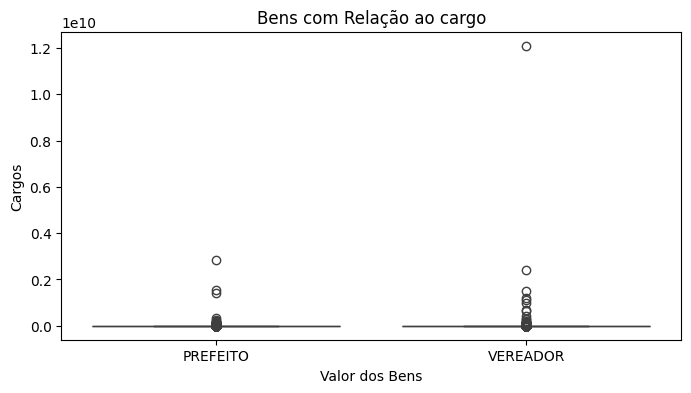

In [141]:
# Boxplot do VR Bem com o tipo de cargo
plt.figure(figsize=(8, 4))
sns.boxplot(x='DS_CARGO', y='VR_BEM_CANDIDATO', data=df)
plt.title('Bens com Relação ao cargo')
plt.xlabel('Valor dos Bens')
plt.ylabel('Cargos')
plt.show()

Percebe - se agora a grande desproporção com base nos outliers.

Vamos agora associar o valor dos bens com a Unidade federativa, Ocupação e Partido Político nos diferentes cargos com histogramas, tentando entender se os *outiliers* continuam a roubar a cena

Por Unidade Federativa:

/tmp/ipython-input-142-381156378.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_prefeito, x='SG_UF', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
/tmp/ipython-input-142-381156378.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_vereador_por_uf, x='SG_UF', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])


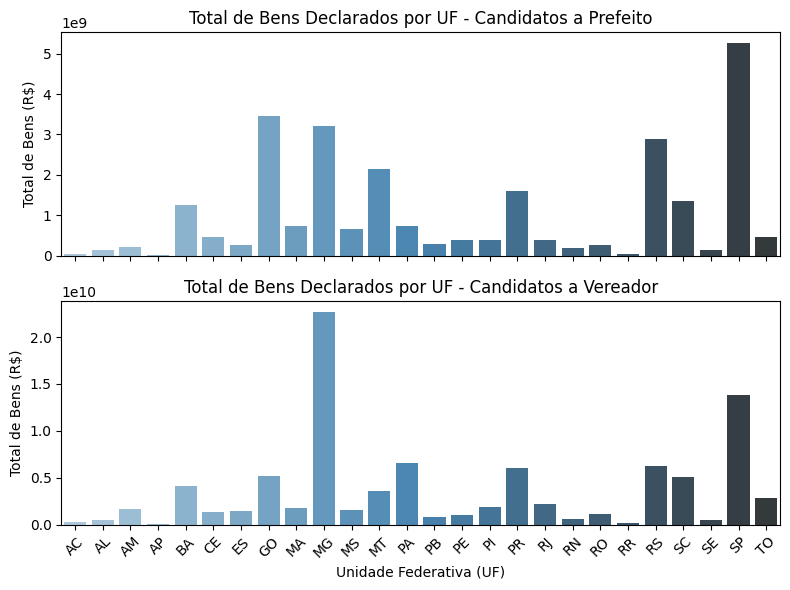

In [142]:
# Agrupando e ordenando os dados de PREFEITOS
bens_prefeito = df_prefeito.groupby('SG_UF')['VR_BEM_CANDIDATO'].sum().reset_index()
bens_prefeito = bens_prefeito.sort_values(by='SG_UF')

# Agrupando e ordenando os dados de VEREADORES
bens_vereador = df_vereador.groupby('SG_UF')['VR_BEM_CANDIDATO'].sum().reset_index()
bens_vereador = bens_vereador.sort_values(by='SG_UF')

# Criar subplots: 2 linhas, 1 coluna
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Gráfico 1: PREFEITOS
sns.barplot(data=bens_prefeito, x='SG_UF', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
axs[0].set_title('Total de Bens Declarados por UF - Candidatos a Prefeito')
axs[0].set_ylabel('Total de Bens (R$)')
axs[0].tick_params(axis='x', rotation=45)

# Gráfico 2: VEREADORES
sns.barplot(data=bens_vereador, x='SG_UF', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])
axs[1].set_title('Total de Bens Declarados por UF - Candidatos a Vereador')
axs[1].set_xlabel('Unidade Federativa (UF)')
axs[1].set_ylabel('Total de Bens (R$)')
axs[1].tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

Por Ocupação:

/tmp/ipython-input-145-3905054082.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_prefeito, x='DS_OCUPACAO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
/tmp/ipython-input-145-3905054082.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_vereador, x='DS_OCUPACAO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])


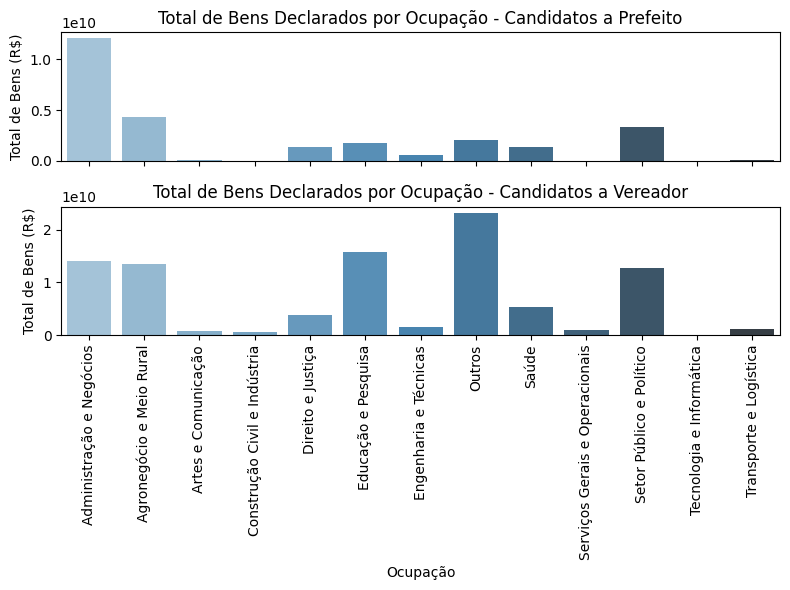

In [145]:
# Agrupando e ordenando os dados de PREFEITOS
bens_prefeito = df_prefeito.groupby('DS_OCUPACAO')['VR_BEM_CANDIDATO'].sum().reset_index()
bens_prefeito = bens_prefeito.sort_values(by='DS_OCUPACAO')

# Agrupando e ordenando os dados de VEREADORES
bens_vereador = df_vereador.groupby('DS_OCUPACAO')['VR_BEM_CANDIDATO'].sum().reset_index()
bens_vereador = bens_vereador.sort_values(by='DS_OCUPACAO')

# Criar subplots: 2 linhas, 1 coluna
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Gráfico 1: PREFEITOS
sns.barplot(data=bens_prefeito, x='DS_OCUPACAO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
axs[0].set_title('Total de Bens Declarados por Ocupação - Candidatos a Prefeito')
axs[0].set_ylabel('Total de Bens (R$)')
axs[0].tick_params(axis='x', rotation=45)

# Gráfico 2: VEREADORES
sns.barplot(data=bens_vereador, x='DS_OCUPACAO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])
axs[1].set_title('Total de Bens Declarados por Ocupação - Candidatos a Vereador')
axs[1].set_xlabel('Ocupação')
axs[1].set_ylabel('Total de Bens (R$)')
axs[1].tick_params(axis='x', rotation=90)

# Ajustar layout
plt.tight_layout()
plt.show()

Por Partido:

/tmp/ipython-input-146-3161275118.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_prefeito, x='SG_PARTIDO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
/tmp/ipython-input-146-3161275118.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_vereador, x='SG_PARTIDO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])


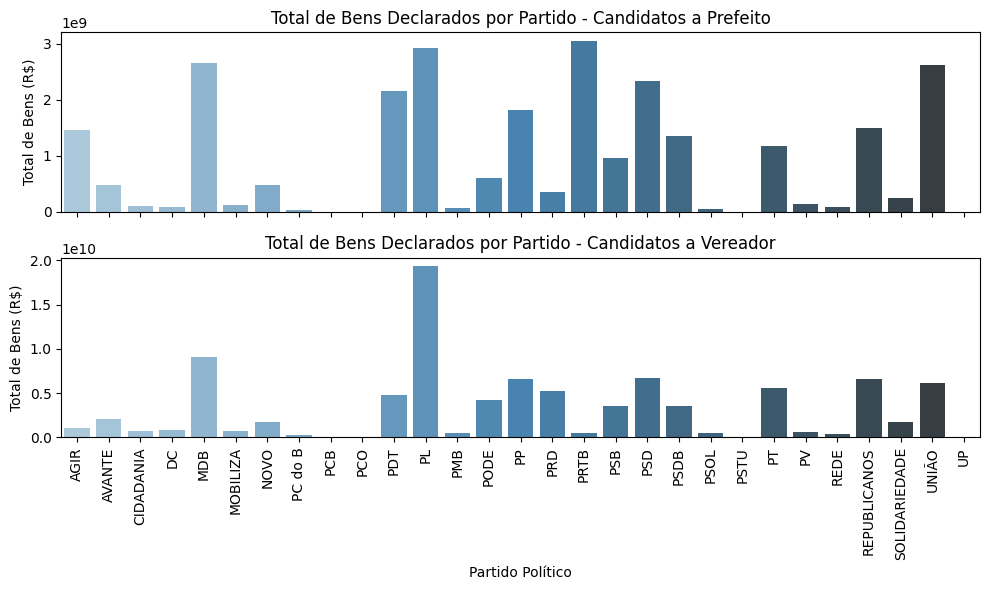

In [146]:
# Agrupando e ordenando os dados de PREFEITOS
bens_prefeito = df_prefeito.groupby('SG_PARTIDO')['VR_BEM_CANDIDATO'].sum().reset_index()
bens_prefeito = bens_prefeito.sort_values(by='SG_PARTIDO')

# Agrupando e ordenando os dados de VEREADORES
bens_vereador = df_vereador.groupby('SG_PARTIDO')['VR_BEM_CANDIDATO'].sum().reset_index()
bens_vereador = bens_vereador.sort_values(by='SG_PARTIDO')

# Criar subplots: 2 linhas, 1 coluna
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Gráfico 1: PREFEITOS
sns.barplot(data=bens_prefeito, x='SG_PARTIDO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
axs[0].set_title('Total de Bens Declarados por Partido - Candidatos a Prefeito')
axs[0].set_ylabel('Total de Bens (R$)')
axs[0].tick_params(axis='x', rotation=45)

# Gráfico 2: VEREADORES
sns.barplot(data=bens_vereador, x='SG_PARTIDO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])
axs[1].set_title('Total de Bens Declarados por Partido - Candidatos a Vereador')
axs[1].set_xlabel('Partido Político')
axs[1].set_ylabel('Total de Bens (R$)')
axs[1].tick_params(axis='x', rotation=90)

# Ajustar layout
plt.tight_layout()
plt.show()

Vamos fazer mais uma por situação na Eleição.

/tmp/ipython-input-147-1574533497.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_prefeito, x='DS_SIT_TOT_TURNO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
/tmp/ipython-input-147-1574533497.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_vereador, x='DS_SIT_TOT_TURNO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])


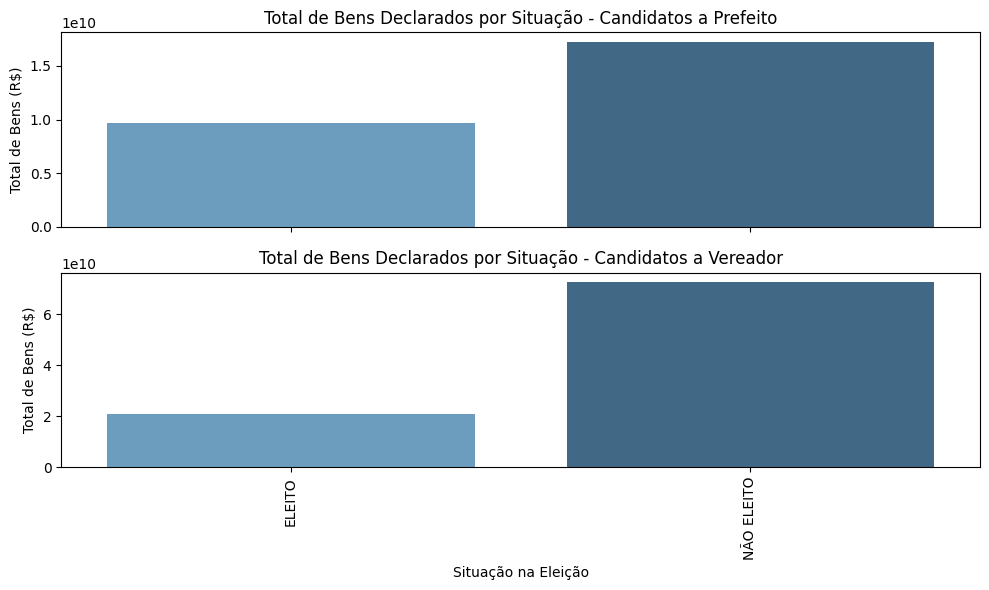

In [147]:
# Agrupando e ordenando os dados de PREFEITOS
bens_prefeito = df_prefeito.groupby('DS_SIT_TOT_TURNO')['VR_BEM_CANDIDATO'].sum().reset_index()
bens_prefeito = bens_prefeito.sort_values(by='DS_SIT_TOT_TURNO')

# Agrupando e ordenando os dados de VEREADORES
bens_vereador = df_vereador.groupby('DS_SIT_TOT_TURNO')['VR_BEM_CANDIDATO'].sum().reset_index()
bens_vereador = bens_vereador.sort_values(by='DS_SIT_TOT_TURNO')

# Criar subplots: 2 linhas, 1 coluna
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Gráfico 1: PREFEITOS
sns.barplot(data=bens_prefeito, x='DS_SIT_TOT_TURNO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
axs[0].set_title('Total de Bens Declarados por Situação - Candidatos a Prefeito')
axs[0].set_ylabel('Total de Bens (R$)')
axs[0].tick_params(axis='x', rotation=45)

# Gráfico 2: VEREADORES
sns.barplot(data=bens_vereador, x='DS_SIT_TOT_TURNO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])
axs[1].set_title('Total de Bens Declarados por Situação - Candidatos a Vereador')
axs[1].set_xlabel('Situação na Eleição')
axs[1].set_ylabel('Total de Bens (R$)')
axs[1].tick_params(axis='x', rotation=90)

# Ajustar layout
plt.tight_layout()
plt.show()

Ao que parece, visualmente podemos ver semelhanças nas características descritas com relação a distribuição por cargos.

### Observações sobre a média
Como notado o dataset possui *outliers* muito discrepantes com relação a base (como iremos ver com o Desvio Padrão), assim quaisquer análises envolvendo média seriam muito enviesadas por esse outliers, vamos adentrar em outras variáveis e depois seguir para conclusão das hipóteses.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores.

Como veremos a seguir a idéia é usar o desvio padrão pra entender o grau de dispersão com base nas características que temos:


Começando por Unidade Federativa:

/tmp/ipython-input-148-3874245996.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_prefeito, x='SG_UF', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
/tmp/ipython-input-148-3874245996.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_vereador, x='SG_UF', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])


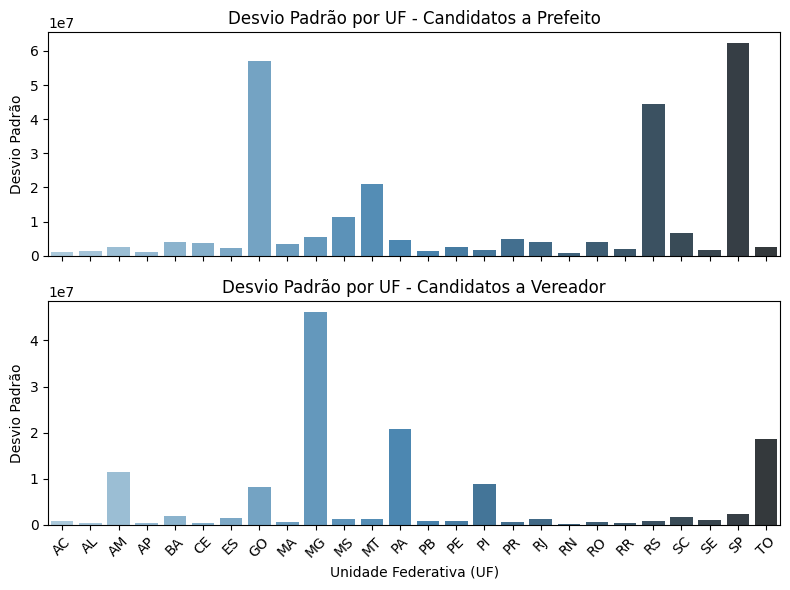

In [148]:
# Agrupando e ordenando os dados de PREFEITOS
bens_prefeito = df_prefeito.groupby('SG_UF')['VR_BEM_CANDIDATO'].std().reset_index()
bens_prefeito = bens_prefeito.sort_values(by='SG_UF')

# Agrupando e ordenando os dados de VEREADORES
bens_vereador = df_vereador.groupby('SG_UF')['VR_BEM_CANDIDATO'].std().reset_index()
bens_vereador = bens_vereador.sort_values(by='SG_UF')

# Criar subplots: 2 linhas, 1 coluna
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Gráfico 1: PREFEITOS
sns.barplot(data=bens_prefeito, x='SG_UF', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
axs[0].set_title('Desvio Padrão por UF - Candidatos a Prefeito')
axs[0].set_ylabel('Desvio Padrão')
axs[0].tick_params(axis='x', rotation=45)

# Gráfico 2: VEREADORES
sns.barplot(data=bens_vereador, x='SG_UF', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])
axs[1].set_title('Desvio Padrão por UF - Candidatos a Vereador')
axs[1].set_xlabel('Unidade Federativa (UF)')
axs[1].set_ylabel('Desvio Padrão')
axs[1].tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

Veremos por Ocupação:


/tmp/ipython-input-149-1163901157.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_prefeito, x='DS_OCUPACAO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
/tmp/ipython-input-149-1163901157.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_vereador, x='DS_OCUPACAO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])


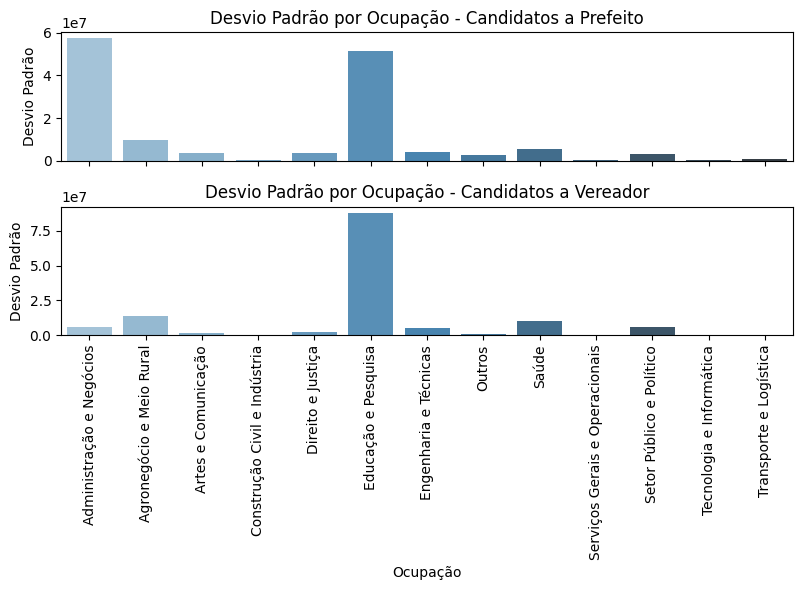

In [149]:
# Agrupando e ordenando os dados de PREFEITOS
bens_prefeito = df_prefeito.groupby('DS_OCUPACAO')['VR_BEM_CANDIDATO'].std().reset_index()
bens_prefeito = bens_prefeito.sort_values(by='DS_OCUPACAO')

# Agrupando e ordenando os dados de VEREADORES
bens_vereador = df_vereador.groupby('DS_OCUPACAO')['VR_BEM_CANDIDATO'].std().reset_index()
bens_vereador = bens_vereador.sort_values(by='DS_OCUPACAO')

# Criar subplots: 2 linhas, 1 coluna
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Gráfico 1: PREFEITOS
sns.barplot(data=bens_prefeito, x='DS_OCUPACAO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
axs[0].set_title('Desvio Padrão por Ocupação - Candidatos a Prefeito')
axs[0].set_ylabel('Desvio Padrão')


# Gráfico 2: VEREADORES
sns.barplot(data=bens_vereador, x='DS_OCUPACAO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])
axs[1].set_title('Desvio Padrão por Ocupação - Candidatos a Vereador')
axs[1].set_xlabel('Ocupação')
axs[1].set_ylabel('Desvio Padrão')
axs[1].tick_params(axis='x', rotation=90)

# Ajustar layout
plt.tight_layout()
plt.show()

Veremos por partido:

/tmp/ipython-input-150-2682884117.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_prefeito, x='SG_PARTIDO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
/tmp/ipython-input-150-2682884117.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_vereador, x='SG_PARTIDO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])


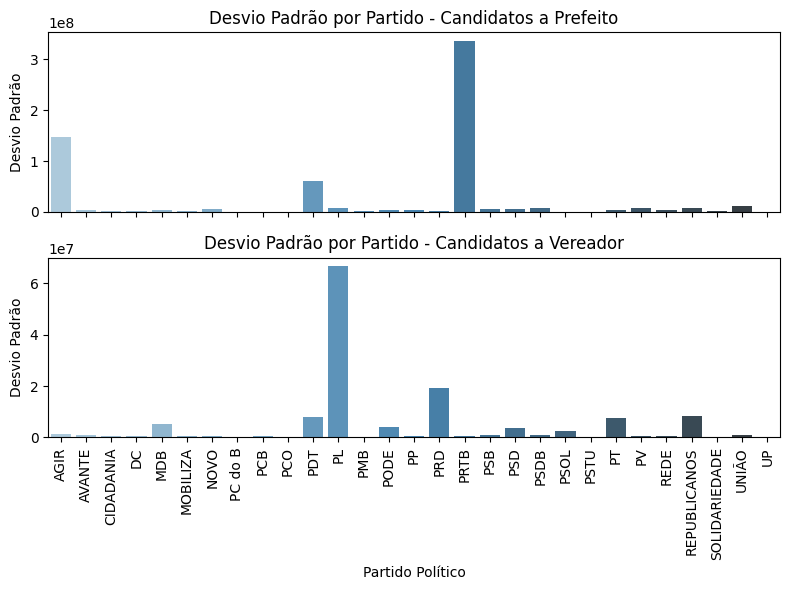

In [150]:
# Agrupando e ordenando os dados de PREFEITOS
bens_prefeito = df_prefeito.groupby('SG_PARTIDO')['VR_BEM_CANDIDATO'].std().reset_index()
bens_prefeito = bens_prefeito.sort_values(by='SG_PARTIDO')

# Agrupando e ordenando os dados de VEREADORES
bens_vereador = df_vereador.groupby('SG_PARTIDO')['VR_BEM_CANDIDATO'].std().reset_index()
bens_vereador = bens_vereador.sort_values(by='SG_PARTIDO')

# Criar subplots: 2 linhas, 1 coluna
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Gráfico 1: PREFEITOS
sns.barplot(data=bens_prefeito, x='SG_PARTIDO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
axs[0].set_title('Desvio Padrão por Partido - Candidatos a Prefeito')
axs[0].set_ylabel('Desvio Padrão')


# Gráfico 2: VEREADORES
sns.barplot(data=bens_vereador, x='SG_PARTIDO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])
axs[1].set_title('Desvio Padrão por Partido - Candidatos a Vereador')
axs[1].set_xlabel('Partido Político')
axs[1].set_ylabel('Desvio Padrão')
axs[1].tick_params(axis='x', rotation=90)

# Ajustar layout
plt.tight_layout()
plt.show()

Agora por situação da eleição:

/tmp/ipython-input-151-169560847.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_prefeito, x='DS_SIT_TOT_TURNO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
/tmp/ipython-input-151-169560847.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bens_prefeito, x='DS_SIT_TOT_TURNO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])


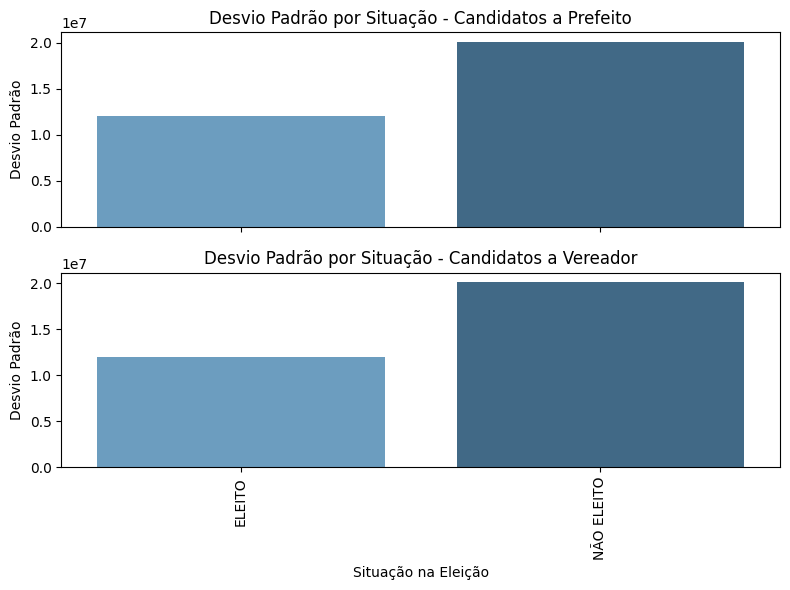

In [151]:
# Agrupando e ordenando os dados de PREFEITOS
bens_prefeito = df_prefeito.groupby('DS_SIT_TOT_TURNO')['VR_BEM_CANDIDATO'].std().reset_index()
bens_prefeito = bens_prefeito.sort_values(by='DS_SIT_TOT_TURNO')

# Agrupando e ordenando os dados de VEREADORES
bens_prefeito = df_vereador.groupby('DS_SIT_TOT_TURNO')['VR_BEM_CANDIDATO'].std().reset_index()
bens_prefeito = bens_prefeito.sort_values(by='DS_SIT_TOT_TURNO')

# Criar subplots: 2 linhas, 1 coluna
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Gráfico 1: PREFEITOS
sns.barplot(data=bens_prefeito, x='DS_SIT_TOT_TURNO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[0])
axs[0].set_title('Desvio Padrão por Situação - Candidatos a Prefeito')
axs[0].set_ylabel('Desvio Padrão')


# Gráfico 2: VEREADORES
sns.barplot(data=bens_prefeito, x='DS_SIT_TOT_TURNO', y='VR_BEM_CANDIDATO', palette='Blues_d', ax=axs[1])
axs[1].set_title('Desvio Padrão por Situação - Candidatos a Vereador')
axs[1].set_xlabel('Situação na Eleição')
axs[1].set_ylabel('Desvio Padrão')
axs[1].tick_params(axis='x', rotation=90)

# Ajustar layout
plt.tight_layout()
plt.show()

Como vimos há um grande desvio padrão mesmo ao agruparmos os dados por características pertinentes.

## Resumo até aqui
Vimos nessa parte de estatística descritiva um aprofundamento nos dados usando algumas métricas para entender a disperção e a profundidade dos dados.

Podemos claramente perceber o forte impacto dos *outliers* na base, que mesmo quebrando pelas características vigentes mostra altos resultados de desvio padrão.

Vamos a seguir adentrar nas hipóteses e tentar entender a necessidade de uma aplicação de um modelo de Machine Learning.

## Adentrando nas Hipóteses
A partir daqui iremos tentar responder a hipótese sobre a necessidade/viabilidade do uso de um modelo classificatório para a nossa base de dados.

Para isso usaremos todos os tratamentos realizados até agora e como ferramenta principal para responder essa pergunta usaremos a Correlação.

### Correlação
A correlação é uma medida estatística que indica o grau de relação entre duas variáveis variado de [-1,1] nos mostra se as variáveis estão fortemente correlacionadas (1) ou fortemente inversmente correlacionadas(-1)

Para aplicar correlação entre variáveis categóricas e numéricas, é necessário transformar as variáveis categóricas em formato numérico, como nosso dataset possui várias informações categóricas iremos abusar da técnica de **one-hot encoding**

Para a execução da correlação vamos usar os campos de:
* Cargo
* Idade
* Genero
* Situação Eleição

Usaremos esses dados por serem os mais básico e o campo de situação da eleição por ser a nossa principal característica.

Mas primeiro vamos adentrar nas características do campo IDADE:

#### IDADE dos Candidatos

Como visto no tópico de **Total e Tipo das Instâncias** temos 79 entradas distintas, vamos entender um pouco mais essas entradas:

In [152]:
# Describe da Entrada
df['IDADE_CAND'].describe()

,IDADE_CAND
count,"447,531.00"
mean,46.87
std,11.51
min,17.00
25%,39.00
50%,47.00
75%,55.00
max,231.00


Perceba que temos uma idade de 231 anos, aparentemente estranha, vamos contar quantas entradas temos acima de 100 anos:

In [153]:
# Filtrar os candidatos com idade maior que 100
candidatos_mais_100 = df[df['IDADE_CAND'] > 100]

# Contar quantos são
quantidade = candidatos_mais_100['SQ_CANDIDATO'].nunique()

print(f"Quantidade de candidatos com mais de 100 anos: {quantidade}")

Quantidade de candidatos com mais de 100 anos: 1


Temos apenas 1 o caso do candidato com 231 anos, veremos acima de 90 e abaixo dos 100:

In [156]:
# Filtrar os candidatos com idade maior que 90
candidatos_mais_90 = df[(df['IDADE_CAND'] > 90) & (df['IDADE_CAND'] < 100)]


# Contar quantos são
quantidade = candidatos_mais_90['SQ_CANDIDATO'].nunique()

print(f"Quantidade de candidatos com mais de 90 anos: {quantidade}")

Quantidade de candidatos com mais de 90 anos: 7


Temos 7 entradas, vamos aprofundar nessa 7 entradas entre 90 e 100:

In [155]:
#Describe dos valores entre 90 e 100:
candidatos_mais_90['IDADE_CAND'].describe()

,IDADE_CAND
count,7.00
mean,93.14
std,2.19
min,91.00
25%,91.50
50%,92.00
75%,95.00
max,96.00


Temos 50% dos dados até 92 anos, sendo o máximo 96, como são poucos casos, manteremos os casos abaixo de 100 anos.

Filtrando as entradas de candidatos abaixo de 100 anos:

In [157]:
# Filtro de Idade 100 anos
df = df[df['IDADE_CAND'] <= 100]

Agora, como possuímos 78 entradas distintas, vamos agrupar essas idades:

Vamos criar um agrupamento para essas idadestentando não adensar muito as entradas em uma única faixa.

Vamos fazer 4 faixas:
* Até 18 completos (sendo que podem haver candidatos eleitorais a partir dos 17)
* Dos 19 aos 30
* Dos 31 aos 50
* Acima dos 51

In [164]:
# Definir os intervalos e os rótulos
bins = [0, 19, 31, 51, float('inf')]
labels = ['0-18', '19-30', '31-50' ,'51+']

# Criar a nova coluna com categorias
df['FAIXA_IDADE'] = pd.cut(df['IDADE_CAND'], bins=bins, labels=labels, right=False)

In [165]:
# Validação do agrupamento
df.groupby(['FAIXA_IDADE'])['SQ_CANDIDATO'].nunique().reset_index()

/tmp/ipython-input-165-361741392.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['FAIXA_IDADE'])['SQ_CANDIDATO'].nunique().reset_index()


,FAIXA_IDADE,SQ_CANDIDATO
0,0-18,588
1,19-30,35087
2,31-50,243847
3,51+,168008


Vemos forte concentração nas faixas de '31-50' e '51+', vamos abri-lás em outras duas faixas:
* Até 18 completos
* Dos 19 aos 30
* Dos 31 aos 40
* Dos 41 aos 50
* Dos 51 aos 60
* Acima dos 61

In [166]:
# Definir os intervalos e os rótulos
bins = [0, 19, 31, 41, 51, 61, float('inf')]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60' ,'61+']

# Criar a nova coluna com categorias
df['FAIXA_IDADE'] = pd.cut(df['IDADE_CAND'], bins=bins, labels=labels, right=False)

In [167]:
# Validação do agrupamento
df.groupby(['FAIXA_IDADE'])['SQ_CANDIDATO'].nunique().reset_index()

/tmp/ipython-input-167-361741392.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['FAIXA_IDADE'])['SQ_CANDIDATO'].nunique().reset_index()


,FAIXA_IDADE,SQ_CANDIDATO
0,0-18,588
1,19-30,35087
2,31-40,97649
3,41-50,146198
4,51-60,112192
5,61+,55816


Pronto, agora podemos partir para o **one-hot encoding** das variáveis categóricas.

#### One-Hot Encoding
Aqui transformaremos nossos campos categóricos em colunas.

Vamos validar as entradas únicas de cada coluna e aplicar o one-hot encoding.

Lembrando que essa técnica gera uma nova coluna para cada categoria apresentada, assim aumentaremos consideravelmente o número de colunas:

Vamos novamente selecionar as colunas pertinentes e aplicar o método nas colunas categoricas:


In [168]:
#Entradas únicas por colunas
df.nunique()

,0
ANO_ELEICAO,1
CD_TIPO_ELEICAO,1
NM_TIPO_ELEICAO,1
TP_ABRANGENCIA,1
SG_UF,26
CD_CARGO,2
DS_CARGO,2
SQ_CANDIDATO,447530
NM_CANDIDATO,429483
NR_PARTIDO,29


Vamos selecionar as colunas a serem utilizadas como base da nossa matriz de correlação.

Iremos aplicar o **one-hot encoding** nas colunas de:

* Cargo
* Idade
* Genero
* Situação Eleição

Escolhendo essas colunas primeiro para uma primeira análise das correlações com os campos de Valor de Bens e Quantidade de Bens.

Iremos utilizar o método *get_dummies* do pandas para facilitar na criação das colunas

In [169]:
# Selecionando colunas
df_one_hot = df[['ANO_ELEICAO','TP_ABRANGENCIA','DS_CARGO','SQ_CANDIDATO'
    ,'NM_CANDIDATO','FAIXA_IDADE','SG_UF', 'SG_PARTIDO','DS_GENERO'
    ,'DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL','DS_COR_RACA'
    ,'DS_OCUPACAO','DS_SIT_TOT_TURNO','VR_BEM_CANDIDATO','QTD_BEM_CANDIDATO' ]];

Neste momento vamos salvar um .csv para mantermos nossos tratamentos finais.

In [170]:
df_one_hot.to_csv('/content/drive/MyDrive/MVP/dataset_pre_ml.csv', index=False)

In [171]:
# Importar .csv recem gerado
url_dataset = '/content/drive/MyDrive/MVP/dataset_pre_ml.csv'



df_one_hot = pd.DataFrame(pd.read_csv(url_dataset, delimiter=','));

##### Aplicando no Cargo
Nossa categorização mais importante

In [178]:
# Entradas únicas por colunas
df_one_hot.nunique()

,0
ANO_ELEICAO,1
TP_ABRANGENCIA,1
DS_CARGO,2
SQ_CANDIDATO,447530
NM_CANDIDATO,429483
FAIXA_IDADE,6
SG_UF,26
SG_PARTIDO,29
DS_GENERO,2
DS_GRAU_INSTRUCAO,8


In [177]:
# Instâncias
print(f"Total de instâncias: {len(df_one_hot)}")

Total de instâncias: 447530


In [174]:
# Aplicando método get_dummies
df_encoded = pd.get_dummies(df_one_hot, columns=['DS_CARGO'])

In [175]:
# Validando instâncias
print(f"Total de instâncias: {len(df_encoded)}")

Total de instâncias: 447530


In [180]:
#Entradas únicas por colunas
df_encoded.nunique()

,0
ANO_ELEICAO,1
TP_ABRANGENCIA,1
SQ_CANDIDATO,447530
NM_CANDIDATO,429483
FAIXA_IDADE,6
SG_UF,26
SG_PARTIDO,29
DS_GENERO,2
DS_GRAU_INSTRUCAO,8
DS_ESTADO_CIVIL,5


##### Aplicando na Idade
Nossa mais nova categoria:

In [181]:
# Aplicando método get_dummies
df_encoded = pd.get_dummies(df_encoded, columns=['FAIXA_IDADE'])

In [182]:
#Entradas únicas por colunas
df_encoded.nunique()

,0
ANO_ELEICAO,1
TP_ABRANGENCIA,1
SQ_CANDIDATO,447530
NM_CANDIDATO,429483
SG_UF,26
SG_PARTIDO,29
DS_GENERO,2
DS_GRAU_INSTRUCAO,8
DS_ESTADO_CIVIL,5
DS_COR_RACA,6


##### Aplicando no Genero

In [183]:
# Aplicando método get_dummies
df_encoded = pd.get_dummies(df_encoded, columns=['DS_GENERO'])

In [184]:
#Entradas únicas por colunas
df_encoded.nunique()

,0
ANO_ELEICAO,1
TP_ABRANGENCIA,1
SQ_CANDIDATO,447530
NM_CANDIDATO,429483
SG_UF,26
SG_PARTIDO,29
DS_GRAU_INSTRUCAO,8
DS_ESTADO_CIVIL,5
DS_COR_RACA,6
DS_OCUPACAO,13


##### Aplicando na Situação da Eleição

In [185]:
#Aplicando método get_dummies
df_encoded = pd.get_dummies(df_encoded, columns=['DS_SIT_TOT_TURNO'])

In [186]:
#Entradas únicas por colunas
df_encoded.nunique()

,0
ANO_ELEICAO,1
TP_ABRANGENCIA,1
SQ_CANDIDATO,447530
NM_CANDIDATO,429483
SG_UF,26
SG_PARTIDO,29
DS_GRAU_INSTRUCAO,8
DS_ESTADO_CIVIL,5
DS_COR_RACA,6
DS_OCUPACAO,13


Agora podemos aplicar a matriz de correlação.

#### Matriz de Correlação

Aqui aplicaremos a matriz de correlação com as colunas transformadas pelo **one-hot encoding**.

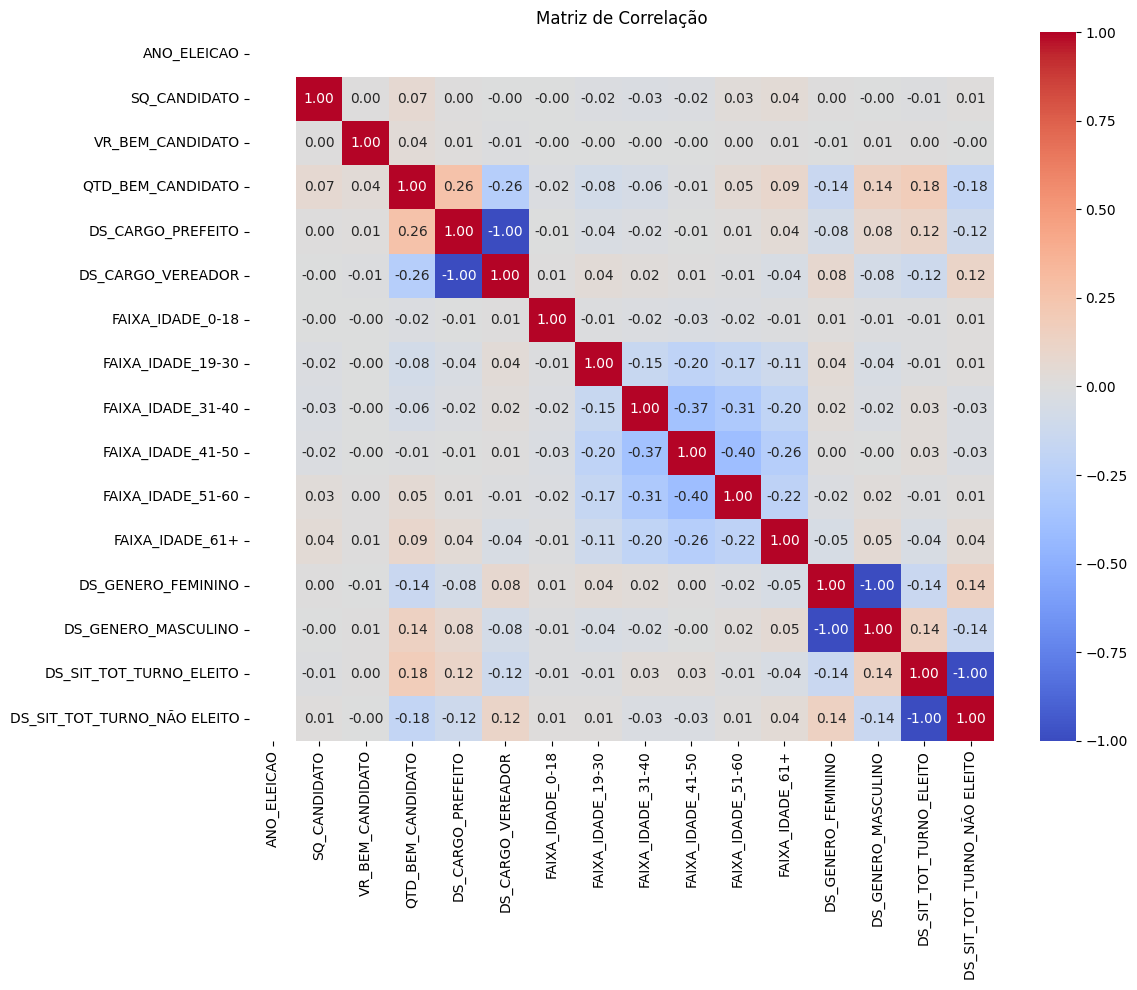

In [187]:
# Matriz correlação
correlacao = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

##### Analisando a Matriz de Correlação

Para facilitar nossa interpretação do gráfico vamos avaliar uma parte da matriz, já que quando seccionadas pela diagonal a matriz é espelhada na parte superior e na parte inferior:

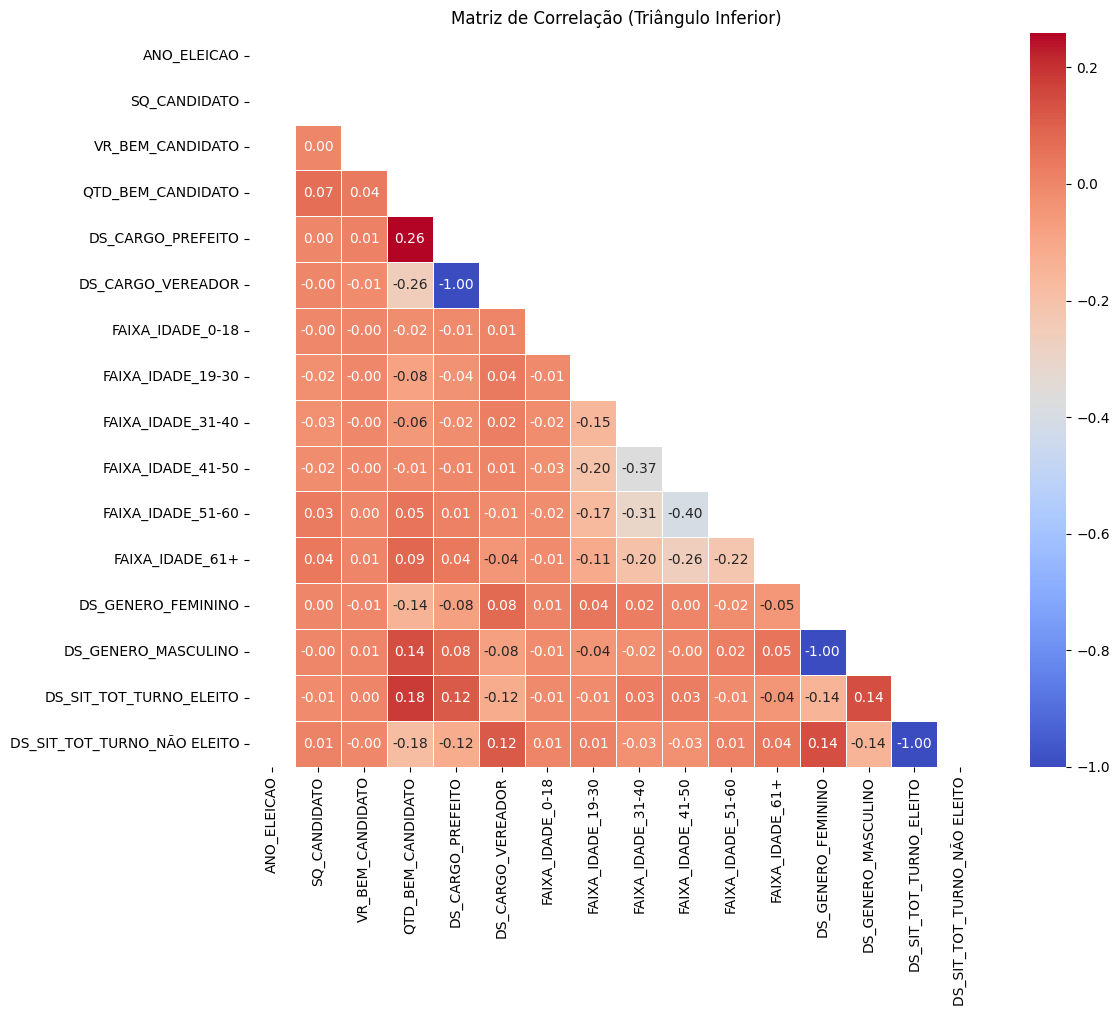

In [188]:
# Calcular correlação
correlacao = df_encoded.corr(numeric_only=True)

# Criar máscara para a parte superior
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlacao,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True
)
plt.title('Matriz de Correlação (Triângulo Inferior)')
plt.tight_layout()
plt.show()

Como nossa principal hipótese queríamos entender se existe uma relação entre os campos "VR_BEM_CANDIDATO" (campo de valor de bens declarados pelos candidatos) e o campo "QTD_BENS_CANDIDATO" (campo construído contando a quantidade de bens declarados), com as demais colunas de características dos candidatos e principalmente a relação com a situação desse candidato na eleição.

Podemos notar via nossa matriz, que as nossas variáveis pouco impactam nas demais características.

Voltando nossa atenção para as colunas 3 e 4 vemos leves variações de correlação de QTD bens de candidatos com o cargo de Prefeito, faixa etária 61+, com genêro Masculino e com a situação eleita nas eleições.

Temos por tanto uma atestação da invalidade de nossas hipóteses.

# Pré-Processamento de Dados

Como parte obrigatória do estudo iremos agora para o pré processamento voltado para a aplicação do modelo, nele iremos fazer mais algumas transformações, split entre teste e treino e as conclusões finais sobre as hipóteses levantadas.

Mesmo com a comprovação da baixa correlação entre as variáveis podemos aida aplicar modelos de **classificação não supervisionada**, ou outros tipos de modelos que possam adentrar mais nos ddados.

Para iniciar vamos fazer uma nova seleção de colunas retirando as colunas redundantes, como por exemplo as criadas na etapa anterior do **one-hot encoding** a partir de colunas categóricas com apenas duas categorias e também quaisquer colunas não numéricas como nome dos candidatos

In [189]:
# Selecionando colunas para o modelo
df_modelo = df_encoded[[
     'DS_GENERO_MASCULINO','DS_CARGO_PREFEITO','FAIXA_IDADE_0-18'
    ,'FAIXA_IDADE_19-30','FAIXA_IDADE_31-40','FAIXA_IDADE_41-50','FAIXA_IDADE_51-60','FAIXA_IDADE_61+'
    ,'DS_SIT_TOT_TURNO_ELEITO','VR_BEM_CANDIDATO','QTD_BEM_CANDIDATO']];

In [190]:
# Separar features (X) e target (y)
X = df_modelo.drop('DS_SIT_TOT_TURNO_ELEITO', axis=1)
y = df_modelo['DS_SIT_TOT_TURNO_ELEITO']

In [191]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [192]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (358024, 10)
Dimensões de X_test: (89506, 10)
Dimensões de y_train: (358024,)
Dimensões de y_test: (89506,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



Como a mairia de nossas colunas está em formato binário a normalização parece ser o método mais adequado a ser usado.

In [193]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [194]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [195]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [226]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
# Sample dos dados
df_normalized.sample(5)


Primeiras 5 linhas dos dados normalizados (treino):


,DS_GENERO_MASCULINO,DS_CARGO_PREFEITO,FAIXA_IDADE_0-18,FAIXA_IDADE_19-30,FAIXA_IDADE_31-40,FAIXA_IDADE_41-50,FAIXA_IDADE_51-60,FAIXA_IDADE_61+,VR_BEM_CANDIDATO,QTD_BEM_CANDIDATO
254917,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
294504,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
7661,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.01
324924,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
231330,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [208]:
df_normalized.nunique()

,0
DS_GENERO_MASCULINO,2
DS_CARGO_PREFEITO,2
FAIXA_IDADE_0-18,2
FAIXA_IDADE_19-30,2
FAIXA_IDADE_31-40,2
FAIXA_IDADE_41-50,2
FAIXA_IDADE_51-60,2
FAIXA_IDADE_61+,2
VR_BEM_CANDIDATO,65488
QTD_BEM_CANDIDATO,102


# Conclusão



Como visto, tivemos um trabalho árduo para tratar e ajustar as variáveis do dataset para ficarem mais fáceis de serem entendidas, entretanto tivemos um resultado negativo as hipóteses.

Podemos observar na análise, que o dataset possui *outliers* extremamente desproporcionais à base, podendo ser facilmente verificado no gráfico de boxplot onde vemos apenas a representação desses outliers, talvez em futuras análises caiba retirar os chamados *outliers* e refazer as análises tentando encontrar novas correlações.

Mesmo com isso fizemos um trabalho voltado para o ajuste das métricas, entendê-las e decidir quais decisões serão tomadas para tratar dados "estranhos" é o principal objetivo do projeto. Chegamos em um dataset final tratado e ajustado para uma aplicação de modelo.

Há ainda mesmo com os resultados negativos uma imensidão de dados a serem avaliados, o dataset é riquíssimo e todos os resultados aqui obtidos são importantes para entender e melhor interpertar a conjuntura das eleições, mesmo que o fóco aqui seja puramente uma análise exploratória.